# Customer Churn Prediction - Telecom Dataset

## Project Overview

This project aims to analyze customer data from a telecommunications company to predict **customer churn** — identifying customers who are likely to leave the service. By understanding the factors influencing churn, the company can improve customer retention strategies and customer satisfaction.

## Dataset Source
- **Name:** Telco Customer Churn Dataset  
- **Source:** [Kaggle - Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn) 
- **Description:** This dataset contains information about a telecom company's customers, including demographic details, account information, services subscribed to, and whether the customer has churned.   
- **Number of Records:** 7,043 customer records  
- **Number of Features:** 21 features including customerID

## Data Dictionary

| Column Name | Description |
|------------|-------------|
| customerID | Unique identifier for each customer. |
| gender | Gender of the customer — either Male or Female. |
| SeniorCitizen | Indicates if the customer is a senior citizen (1 = Yes, 0 = No). |
| Partner | Whether the customer has a partner — Yes or No. |
| Dependents | Whether the customer has dependents — Yes or No. |
| tenure | Number of months the customer has been with the company. |
| PhoneService | Whether the customer has phone service — Yes or No. |
| MultipleLines | Whether the customer has multiple phone lines — Yes, No, or No phone service. |
| InternetService | Type of internet service — DSL, Fiber optic, or No internet service. |
| OnlineSecurity | Whether the customer subscribes to online security services — Yes, No, or No internet service. |
| OnlineBackup | Whether the customer subscribes to online backup services — Yes, No, or No internet service. |
| DeviceProtection | Whether the customer subscribes to device protection services — Yes, No, or No internet service. |
| TechSupport | Whether the customer subscribes to tech support services — Yes, No, or No internet service. |
| StreamingTV | Whether the customer subscribes to streaming TV services — Yes, No, or No internet service. |
| StreamingMovies | Whether the customer subscribes to streaming movie services — Yes, No, or No internet service. |
| Contract | Type of contract — Month-to-month, One year, or Two year. |
| PaperlessBilling | Whether the customer uses paperless billing — Yes or No. |
| PaymentMethod | Payment method used by the customer — Electronic check, Mailed check, Bank transfer, or Credit card. |
| MonthlyCharges | Monthly charges incurred by the customer. |
| TotalCharges | Total charges incurred during the customer's tenure. |
| Churn | Whether the customer churned (left the service) — Yes or No. |

## Project Objectives  
- Perform Exploratory Data Analysis (EDA) to uncover trends and patterns related to customer churn.
- Identify the key factors driving customer churn.
- Build and evaluate classification models to predict which customers are likely to churn.
- Provide business recommendations to help reduce customer churn and improve retention.



## Tools & Libraries 
- Python
- Pandas, NumPy (Data Manipulation)
- Matplotlib, Seaborn (Data Visualization)
- Scikit-learn (Machine Learning)


## Project Workflow  
1. Data Understanding & Loading  
2. Data Cleaning & Preprocessing  
3. Exploratory Data Analysis (EDA)  
4. Feature Engineering (if needed)  
5. Model Training & Evaluation  
6. Insights & Business Recommendations


## Importing Libraries  
In this section, we import all the necessary libraries required for data loading, exploration, visualization, modeling, and evaluation.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## Data Loading and Initial Exploration
In this section, we load the dataset and perform basic data checks to understand its structure, spot potential issues (like missing values), and plan the next steps for data cleaning and preprocessing.

In [3]:
# Load the dataset
url = r"C:\Users\mills\OneDrive\Desktop\Customer_Churn_Prediction\WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# First look at the data
print("First 5 Rows of the Dataset:")
display(df.head())

#Basic Info
print("\n Basic Information About the Dataset:")
df.info() 

# Check for missing values
print("\n Missing Values Per Column:")
print(df.isnull().sum())

# Check shape
print(f"\n Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Check unique values in each column 
print("\n Unique Values Per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")
    
# Check class distribution (how many churn vs not churn)
print("\n Churn (Target - Churn):")
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True) * 100)

First 5 Rows of the Dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



 Basic Information About the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Pap

## Dataset Overview

The **Telco Customer Churn dataset** contains information on **7,043 customers** from a telecommunications company. Each row represents a customer, and there are **21 columns** capturing a mix of:

- **Demographic information** (e.g., gender, senior citizen status, dependents)
- **Service usage data** (e.g., internet service type, streaming services, tech support)
- **Account details** (e.g., contract type, billing method, monthly charges, total charges)
- **The target variable** — `Churn`, which indicates whether the customer left the service.

### Key Observations

- The dataset is balanced in terms of completeness — no obvious missing values were detected during the initial inspection.
- However, the **`TotalCharges` column is stored as a string** (`object`), meaning it will need to be converted to numeric for analysis.
- Most features are **categorical**, with a few numeric columns like `tenure`, `MonthlyCharges`, and `TotalCharges`.

### Churn Breakdown

- About **26.5% of customers have churned**, while 73.5% have stayed.
- This shows a **moderate class imbalance**, which will need to be considered during modeling.

### Next Steps

- Perform **data cleaning** to handle data types and any hidden issues.
- Conduct **exploratory data analysis (EDA)** to uncover relationships between customer characteristics, services, and churn behavior.
- Build a **predictive model** to classify customers and identify key drivers of churn.


## Cleaning the Data

In [4]:
# Check if there are spaces or empty strings in TotalCharges
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# Convert to numeric 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# Confirm conversion
print(df['TotalCharges'].isnull().sum(), "missing values after conversion")

11 missing values after conversion


In [5]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

print(df['TotalCharges'].isnull().sum(), "missing values after filling")

0 missing values after filling


In [6]:
# Check for duplicates across all columns
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [7]:
df = df.drop(columns=['customerID'])

In [8]:
# Columns with "No internet service" or "No phone service"
service_columns = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Consolidate "No internet service" into "No"
for col in service_columns:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

In [9]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis

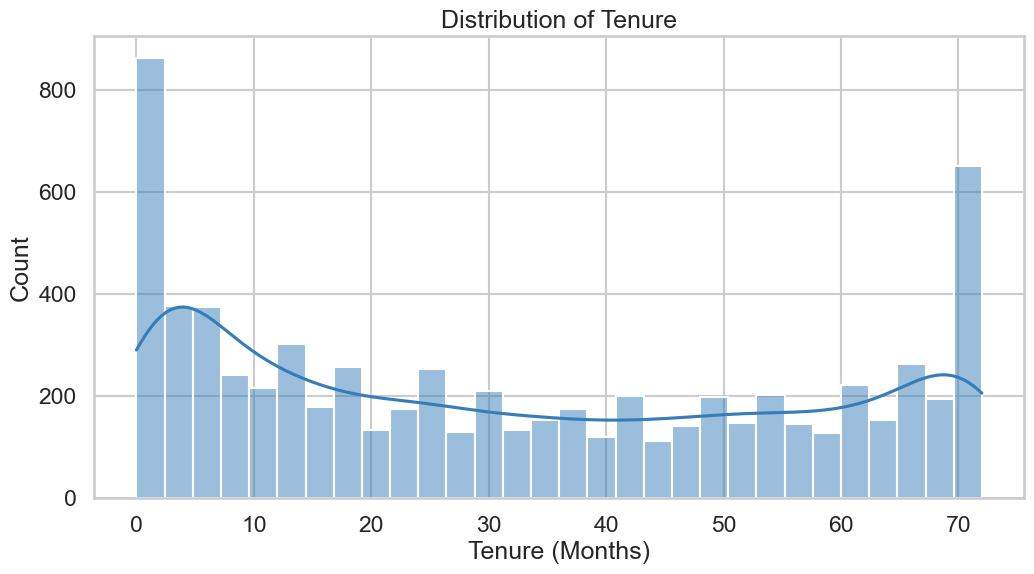

In [10]:
# Set colorblind-friendly style
sns.set(style="whitegrid", context="talk")

# Tenure Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['tenure'], kde=True, color='#377eb8', bins=30)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()

This plot shows the distribution of customer tenure (in months), providing insight into customer lifecycle stages.

- **Key Observations**:
    - There’s a spike at **0-1 months**, indicating **high early churn** — many customers leave shortly after joining.
    - Another smaller peak around **72 months**, representing **a loyal segment** who stay long-term.
    - This **bimodal distribution** is common in subscription services, where some customers leave quickly, but those who stay beyond the early months often remain for much longer.

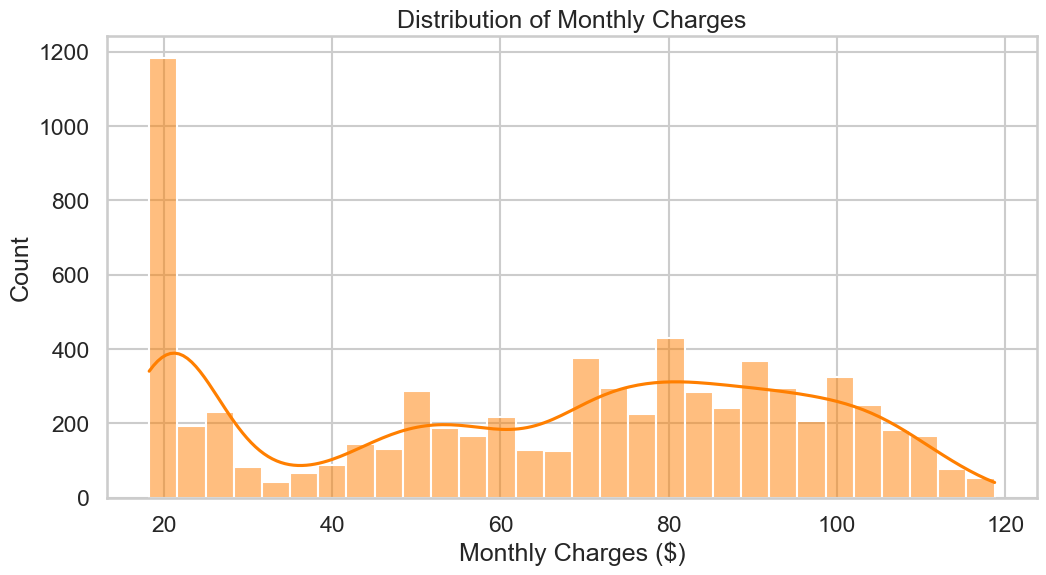

In [11]:
# Set colorblind-friendly style
sns.set(style="whitegrid", context="talk")

# MonthlyCharges Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['MonthlyCharges'], kde=True, color='#ff7f00', bins=30)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Count')
plt.show()

This plot shows how much customers pay monthly.

- **Key Observations**:
    - Most customers pay **under 25 dollars per month**.
    - Some customers pay over **100 dollars per month**, indicating premium packages.
    - There’s a wide spread, reflecting multiple service tiers (basic, premium, bundled).

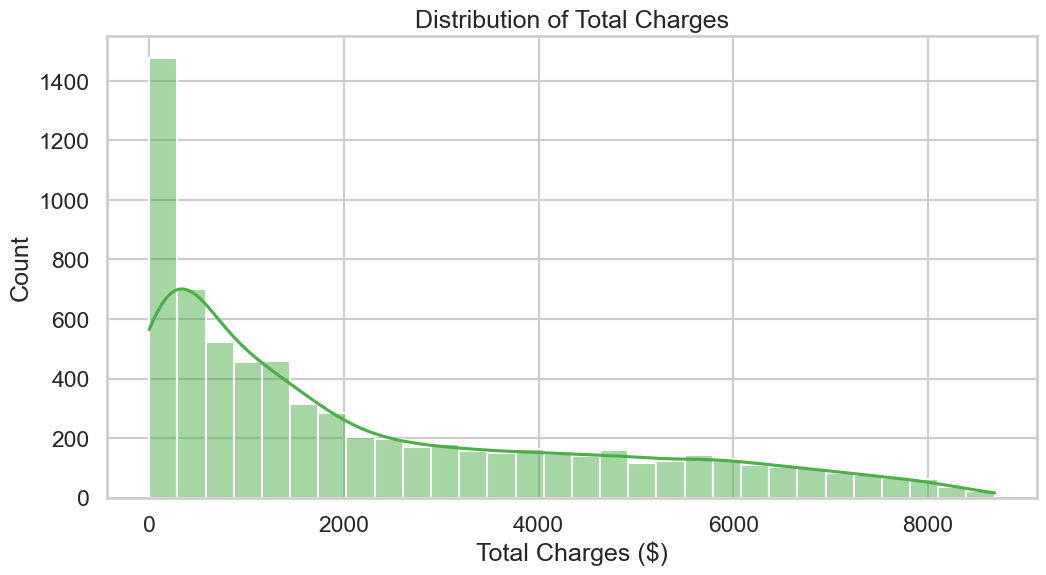

In [12]:
# Set colorblind-friendly style
sns.set(style="whitegrid", context="talk")

# TotalCharges Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['TotalCharges'], kde=True, color='#4daf4a', bins=30)
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges ($)')
plt.ylabel('Count')
plt.show()

This plot tracks the **cumulative amount** each customer has paid.

- **Key Observations**:
    - Most customers have **low total charges**, indicating **short tenures**.
    - Distribution is **right-skewed**, with a small number of long-term customers.
    - This supports the observation that **early churn is a major challenge**.

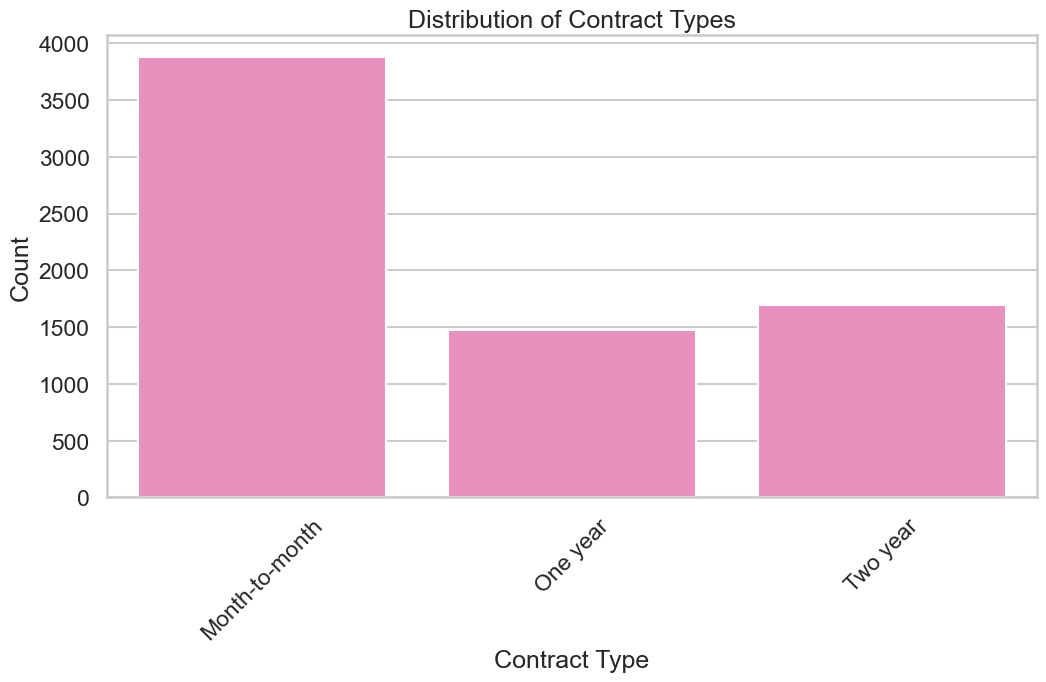

In [13]:
# Contract
plt.figure(figsize=(12, 6))
sns.countplot(x='Contract', data=df,color='#f781bf')
plt.title('Distribution of Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

This plot highlights how customers choose to contract with the company.

- **Key Observations**:
    - Majority of customers are on **Month-to-month** contracts — known to have **higher churn risk**.
    - Fewer customers are on **One-year or Two-year contracts**, which likely offer discounts for commitment.

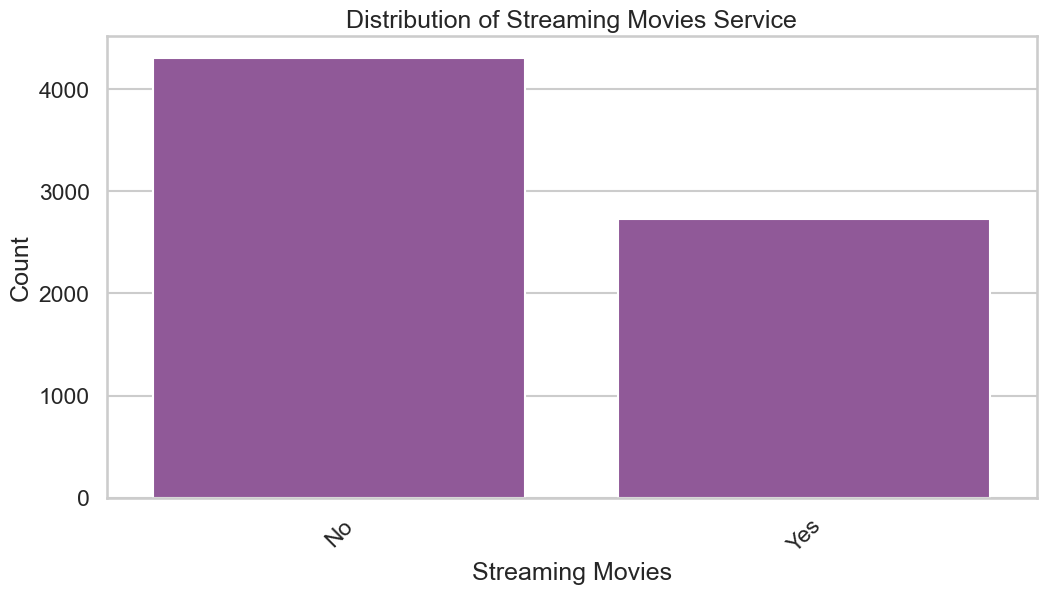

In [14]:
# StreamingMovies
plt.figure(figsize=(12, 6))
sns.countplot(x='StreamingMovies', data=df, color = '#984ea3' )
plt.title('Distribution of Streaming Movies Service')
plt.xlabel('Streaming Movies')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

This shows how many customers have subscribed to **streaming movies**.

- **Key Observations**:
    - A **large segment does not have this service**.
    - Customers with this service could be **more engaged** but also **more price-sensitive** if they find better alternatives.

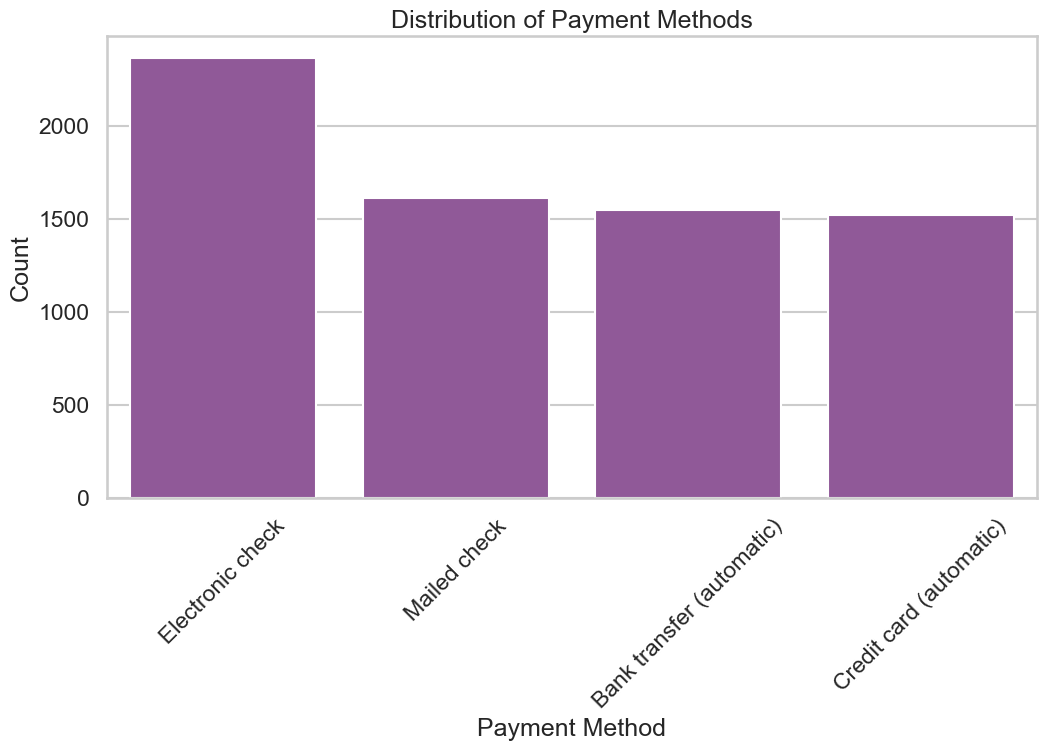

In [15]:
# PaymentMethod
plt.figure(figsize=(12, 6))
sns.countplot(x='PaymentMethod', data=df, color ='#984ea3')
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

This plot highlights customer preferences for paying bills.

- **Key Observations**:
    - **Electronic check** is the most common method, but it’s often linked to **higher churn**.
    - Customers paying via **automatic methods (credit card, bank transfer)** have lower churn.


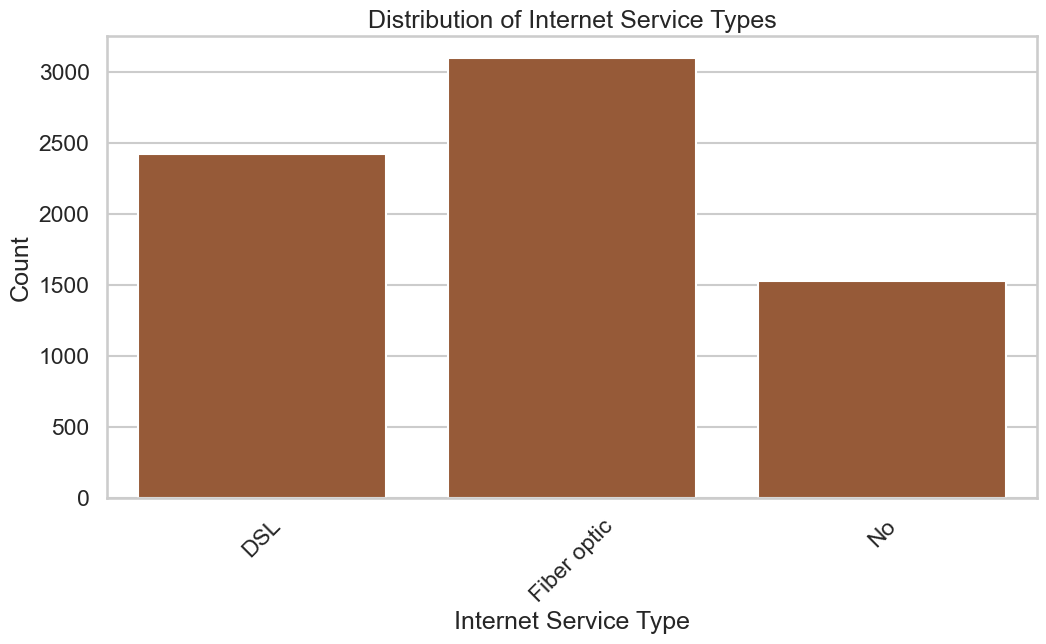

In [16]:
# InternetService
plt.figure(figsize=(12, 6))
sns.countplot(x='InternetService', data=df, color='#a65628')
plt.title('Distribution of Internet Service Types')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

This shows the breakdown of **internet service types**.

- **Key Observations**:
    - Most customers have **Fiber optic**, followed by **DSL**.
    - A small segment has **no internet service** — possibly using only phone services.

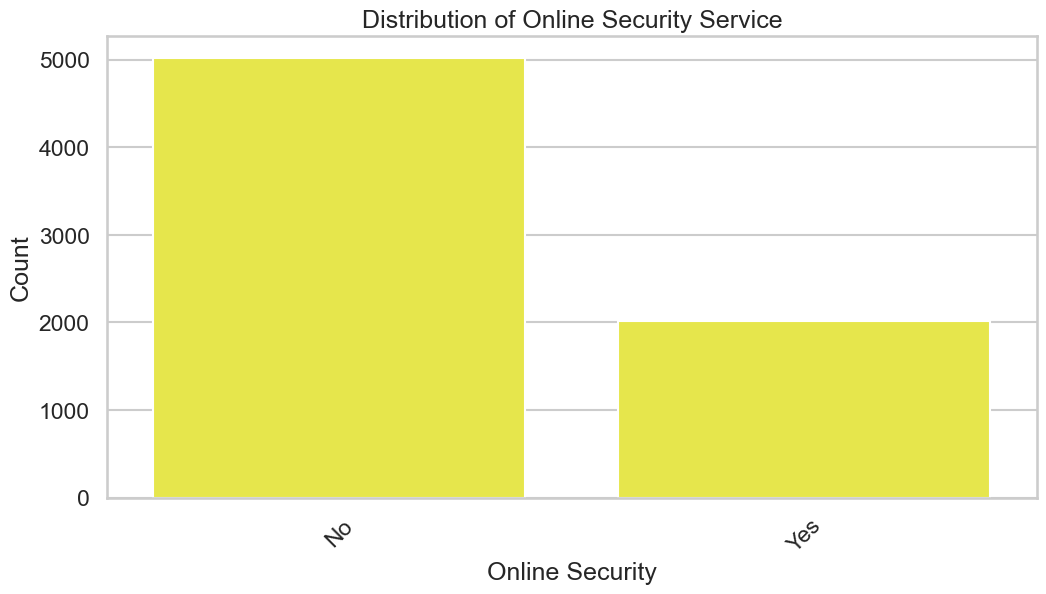

In [18]:
# OnlineSecurity
plt.figure(figsize=(12, 6))
sns.countplot(x='OnlineSecurity', data=df, color='#ffff33')
plt.title('Distribution of Online Security Service')
plt.xlabel('Online Security')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

This tracks how many customers use **online security services**.

- **Key Observations**:
    - Most customers **do not have online security**.
    - Customers subscribing to this add-on may perceive **higher service value**, which **could reduce churn**.

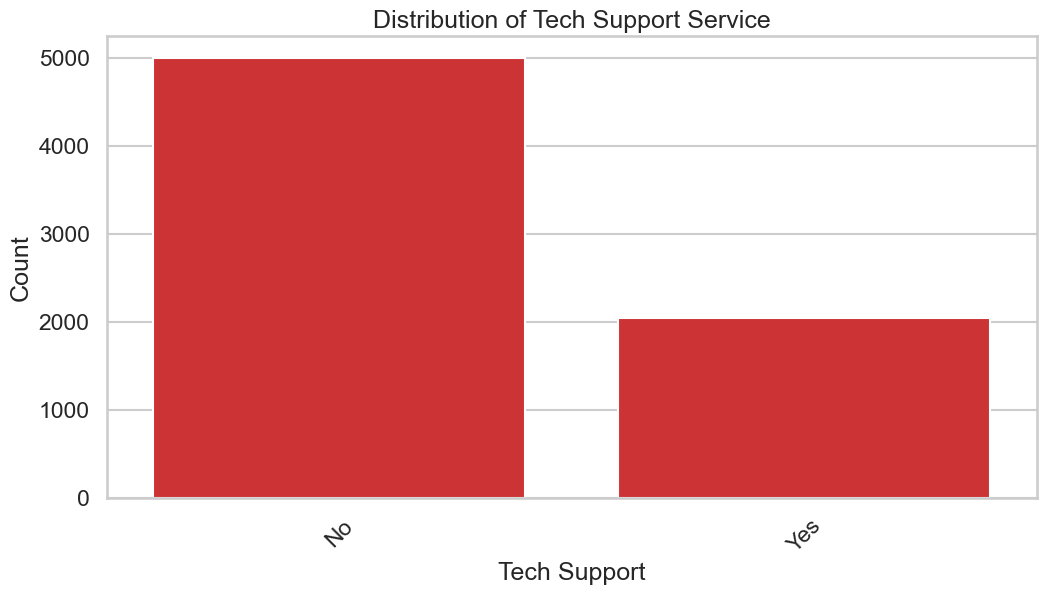

In [19]:
# TechSupport
plt.figure(figsize=(12, 6))
sns.countplot(x='TechSupport', data=df, color ='#e41a1c')
plt.title('Distribution of Tech Support Service')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

This shows the subscription rate for **tech support services**.

- **Key Observations**:
    - Majority **do not subscribe to tech support**.
    - Customers without tech support may feel **underserved** when issues arise, driving churn.

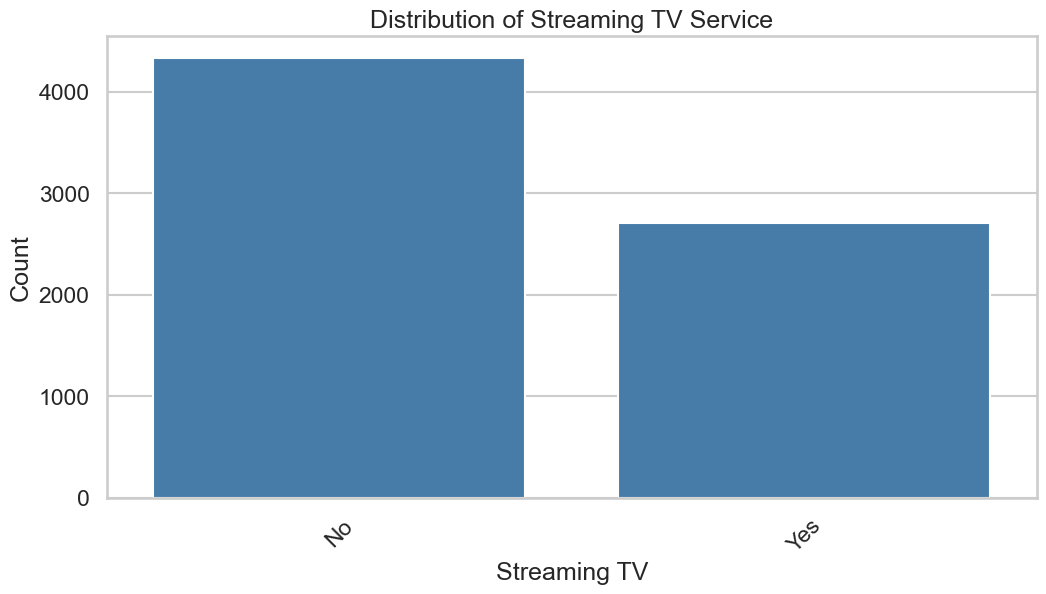

In [20]:
# StreamingTV
plt.figure(figsize=(12, 6))
sns.countplot(x='StreamingTV', data=df, color ='#377eb8')
plt.title('Distribution of Streaming TV Service')
plt.xlabel('Streaming TV')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

This plot tracks **streaming TV** subscriptions.

- **Key Observations**:
    - Many customers **do not subscribe** to streaming TV.
    - Similar to streaming movies, this service could be linked to **higher monthly charges**.

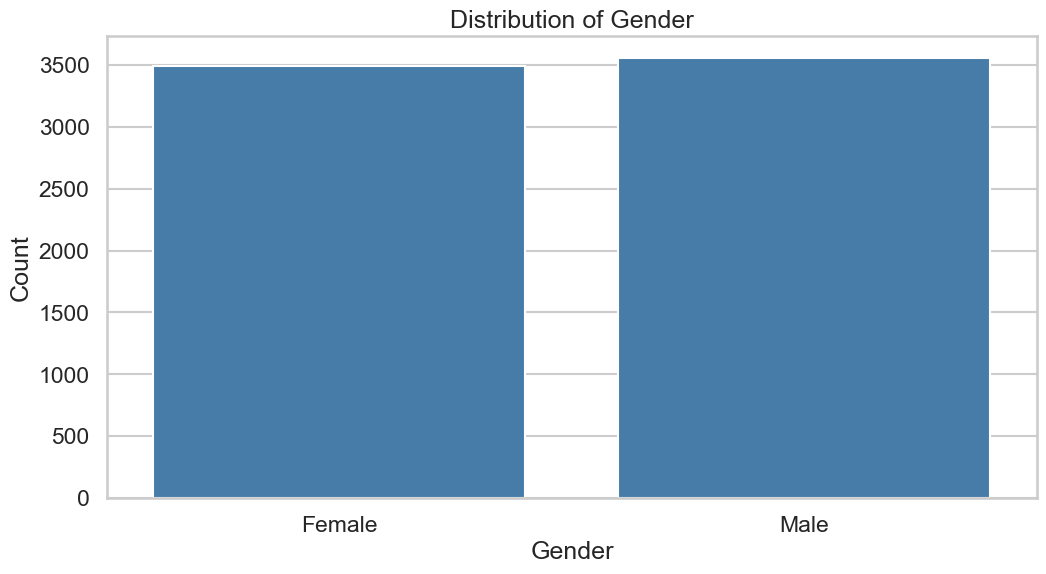

In [21]:
# Gender
plt.figure(figsize=(12, 6))
sns.countplot(x='gender', data=df, color='#377eb8')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

This plot shows the gender distribution of customers.
The male-female split is almost perfectly balanced, meaning gender is unlikely to play a dominant role in churn risk on its own.

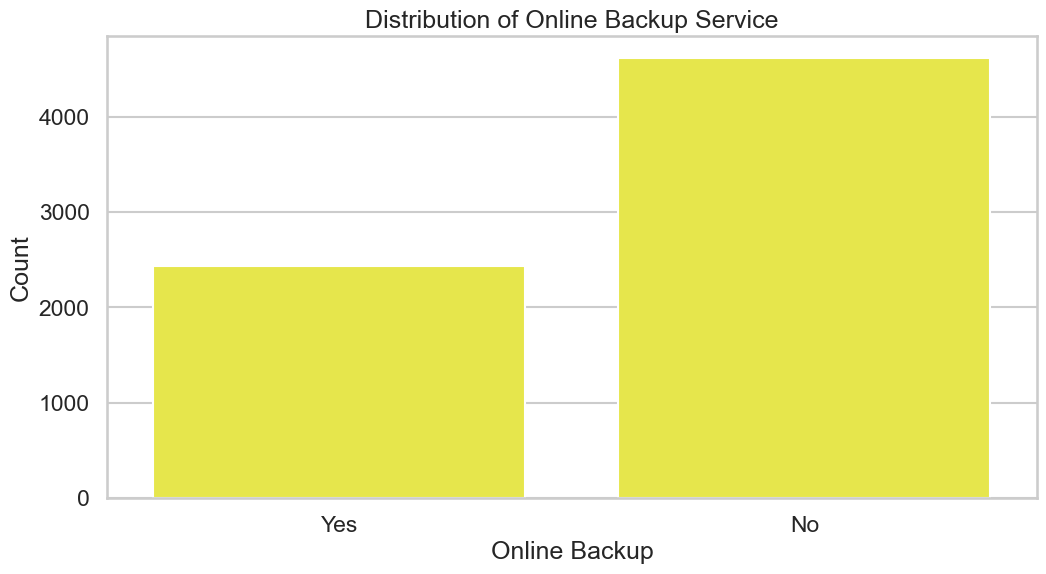

In [22]:
# OnlineBackup
plt.figure(figsize=(12, 6))
sns.countplot(x='OnlineBackup', data=df,color='#ffff33')
plt.title('Distribution of Online Backup Service')
plt.xlabel('Online Backup')
plt.ylabel('Count')
plt.show()

This plot highlights how many customers have subscribed to Online Backup services.
A majority of customers do not have this service.
This could indicate that customers either don’t see the value in backup services or are opting for basic packages.

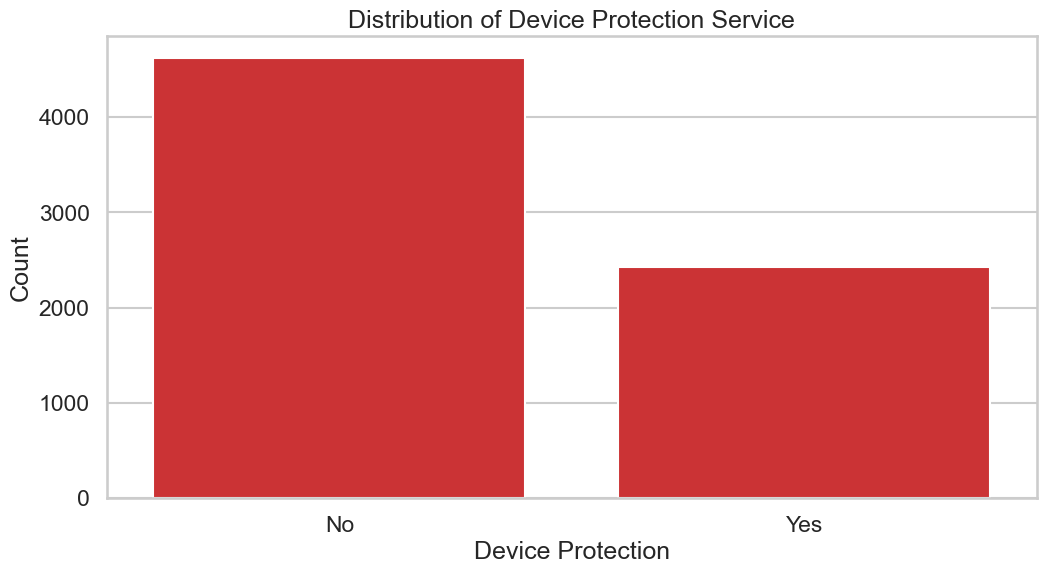

In [23]:
# DeviceProtection
plt.figure(figsize=(12, 6))
sns.countplot(x='DeviceProtection', data=df, color ='#e41a1c')
plt.title('Distribution of Device Protection Service')
plt.xlabel('Device Protection')
plt.ylabel('Count')
plt.show()

This plot shows the distribution of Device Protection subscriptions.
Most customers do not have device protection, similar to online backup.
Offering bundled discounts or improved education on the value of device protection could improve uptake.

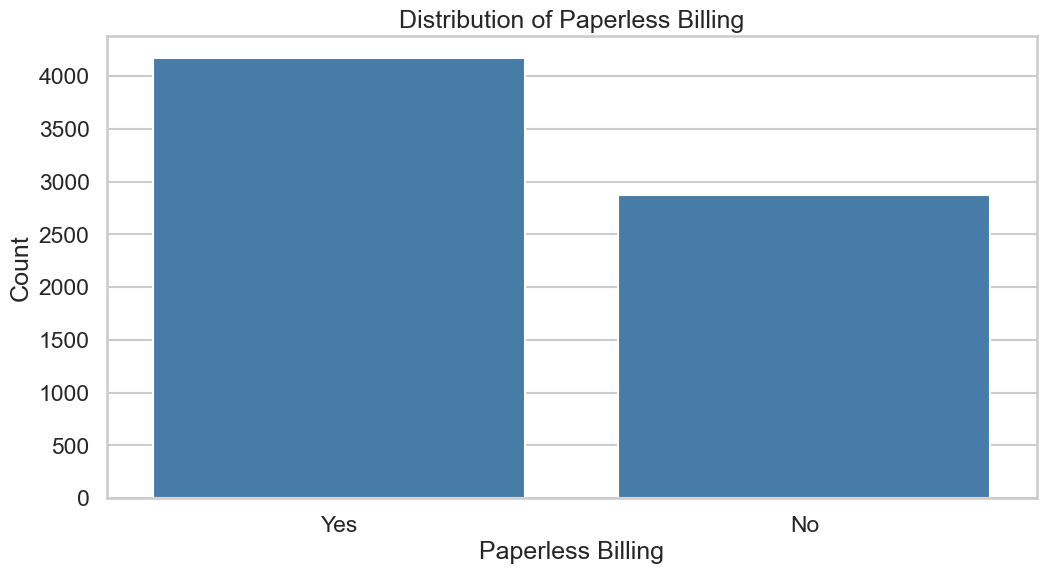

In [24]:
# PaperlessBilling
plt.figure(figsize=(12, 6))
sns.countplot(x='PaperlessBilling', data=df, color='#377eb8')
plt.title('Distribution of Paperless Billing')
plt.xlabel('Paperless Billing')
plt.ylabel('Count')
plt.show()

This plot examines how many customers are on paperless billing.
A majority have adopted paperless billing, showing that customers are open to digital interactions.
Paperless billing customers might also engage more online, making them more reachable for promotions or retention campaigns.

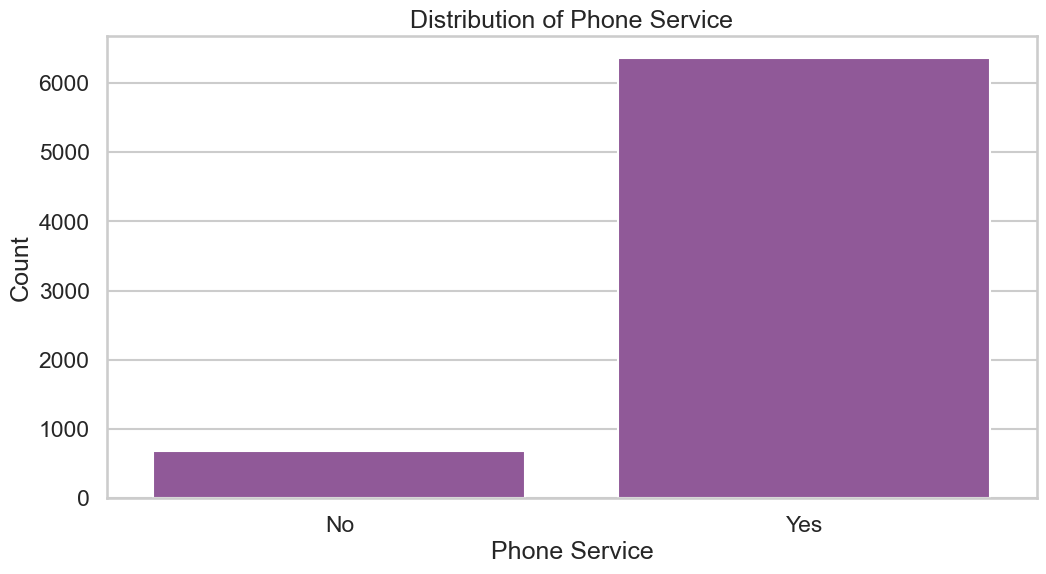

In [25]:
# PhoneService
plt.figure(figsize=(12, 6))
sns.countplot(x='PhoneService', data=df, color='#984ea3')
plt.title('Distribution of Phone Service')
plt.xlabel('Phone Service')
plt.ylabel('Count')
plt.show()

This plot shows the presence of phone services.
Nearly all customers have phone services, indicating it’s a core service.
The small subset without phone service may be internet-only customers.

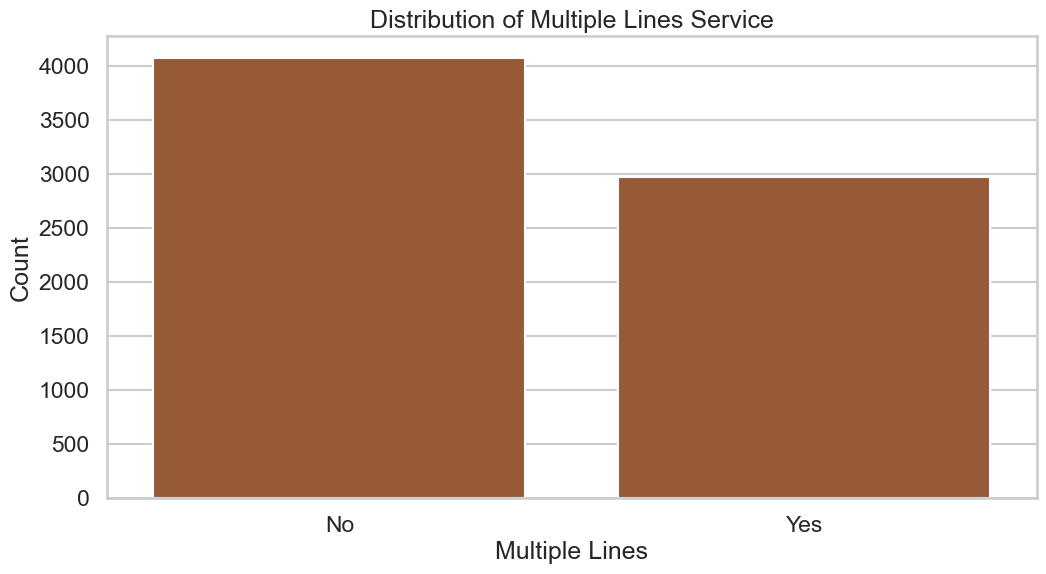

In [26]:
# MultipleLines
plt.figure(figsize=(12, 6))
sns.countplot(x='MultipleLines', data=df, color='#a65628')
plt.title('Distribution of Multiple Lines Service')
plt.xlabel('Multiple Lines')
plt.ylabel('Count')
plt.show()

This plot covers whether customers have multiple lines.
Most customers do not have multiple lines, indicating many are single-line accounts.
Multiple-line customers might be more loyal as they rely on the service for family or business use.

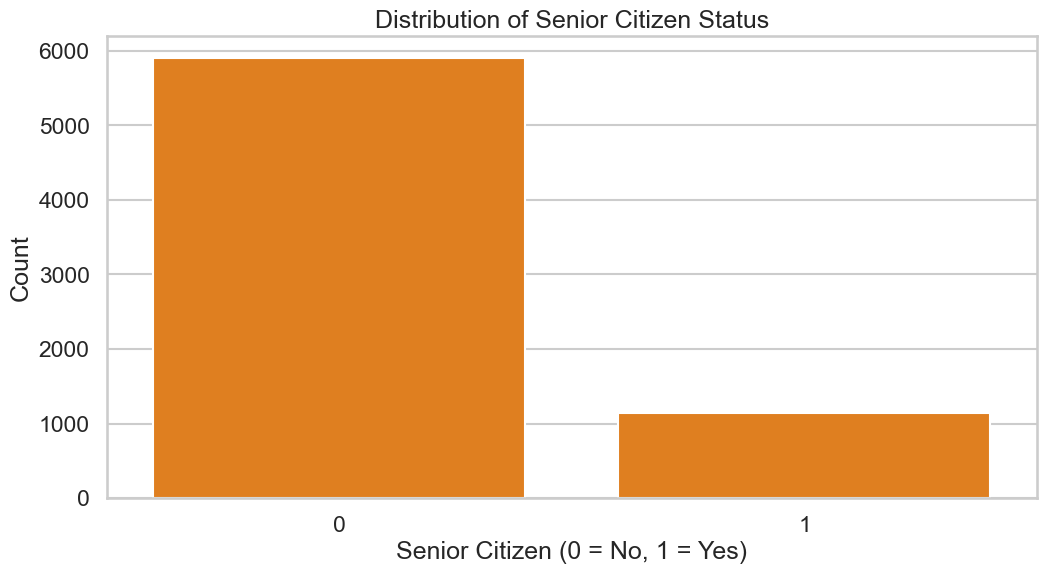

In [27]:
# SeniorCitizen
plt.figure(figsize=(12, 6))
sns.countplot(x='SeniorCitizen', data=df, color='#ff7f00')
plt.title('Distribution of Senior Citizen Status')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

This plot breaks down the age segment into Senior Citizens vs Non-Seniors.
The vast majority are not senior citizens, meaning the customer base skews younger.
Seniors might have different support needs and expectations, which could drive different churn behaviors.

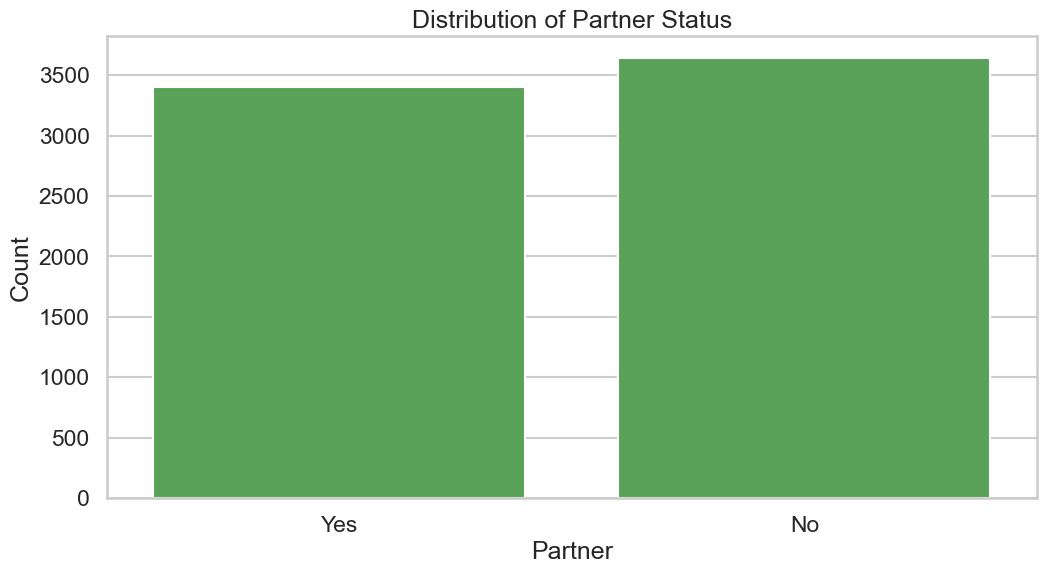

In [28]:
# Partner
plt.figure(figsize=(12, 6))
sns.countplot(x='Partner', data=df, color='#4daf4a')
plt.title('Distribution of Partner Status')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.show()

This plot shows whether customers have a partner.
The split is fairly even, with a slight majority having no partner.
Partnered customers may be more stable in their subscriptions if they share services with a spouse.

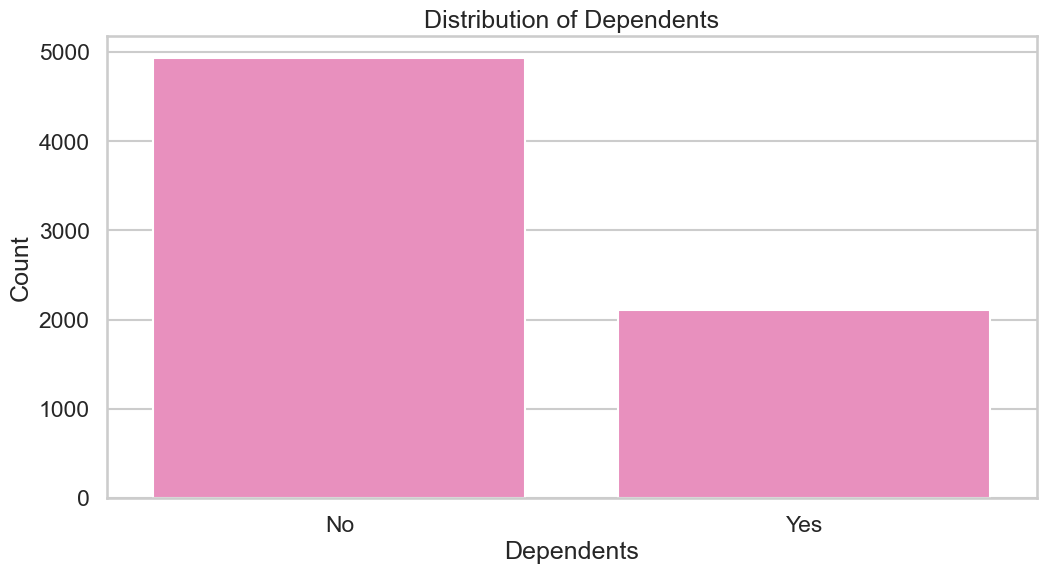

In [29]:
# Dependents
plt.figure(figsize=(12, 6))
sns.countplot(x='Dependents', data=df, color='#f781bf')
plt.title('Distribution of Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.show()

This plot shows whether customers have dependents (children or others relying on their account).
The majority have no dependents, meaning a large share of customers are individuals rather than families.
Customers with dependents may be less likely to churn if the service supports their household.

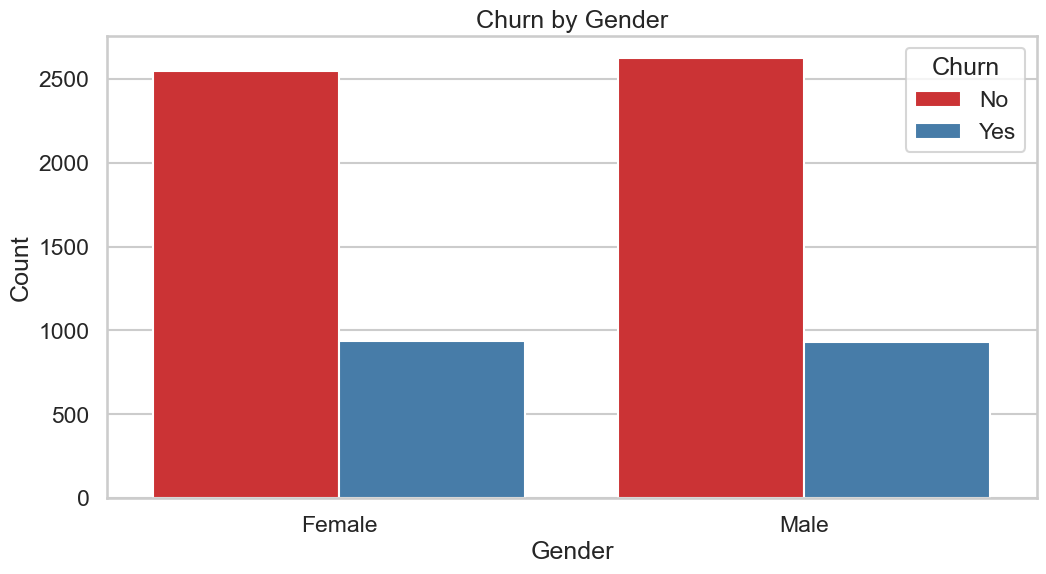

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(x='gender', hue='Churn', data=df, palette='Set1')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

This plot adds churn rates to the gender breakdown.
Males and females have very similar churn rates, confirming that gender alone is not a strong predictor of churn.
This reinforces the need to focus on service usage, contract type, and charges rather than demographic attributes like gender.

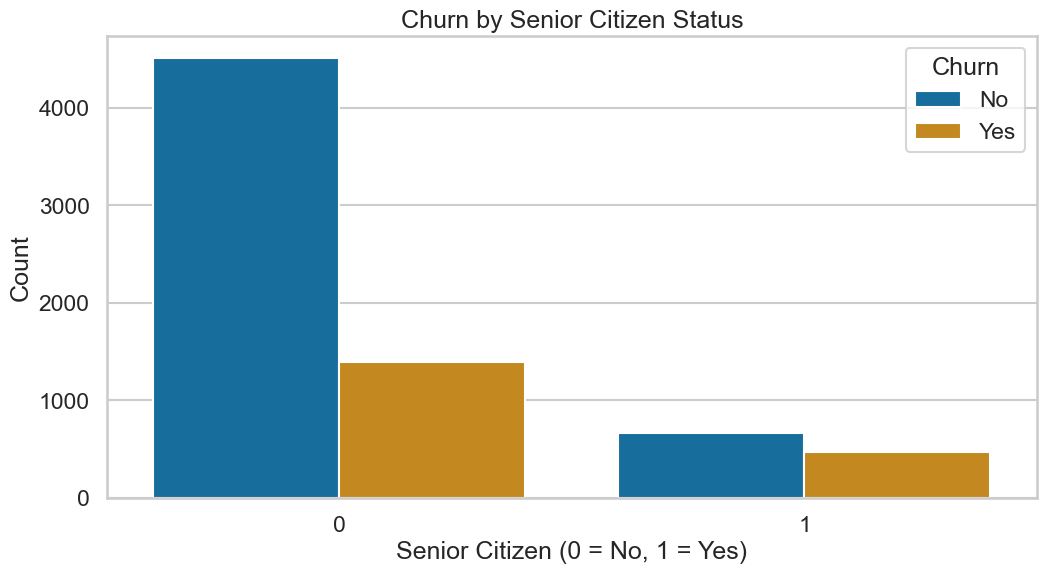

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette='colorblind')
plt.title('Churn by Senior Citizen Status')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

Non-senior citizens greatly outnumber senior citizens.
Senior citizens have a higher churn rate compared to non-seniors.

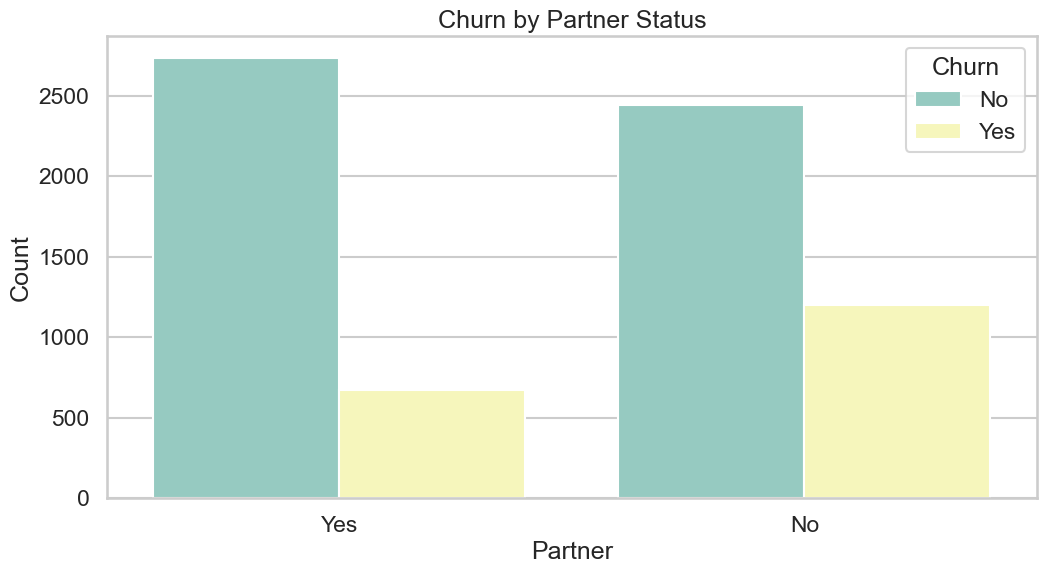

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Partner', hue='Churn', data=df, palette='Set3')
plt.title('Churn by Partner Status')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.show()

Customers without partners churn more than those with partners.
Partnered customers are more likely to stay.



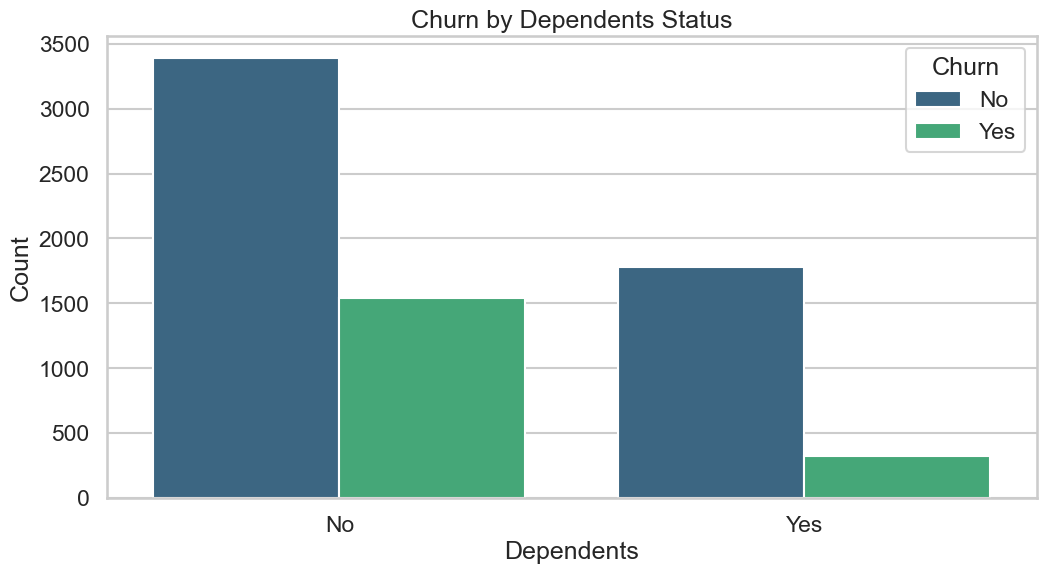

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Dependents', hue='Churn', data=df, palette='viridis')
plt.title('Churn by Dependents Status')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.show()

Customers without dependents churn more than those with dependents.
This could indicate dependents bring more stability in customer retention.

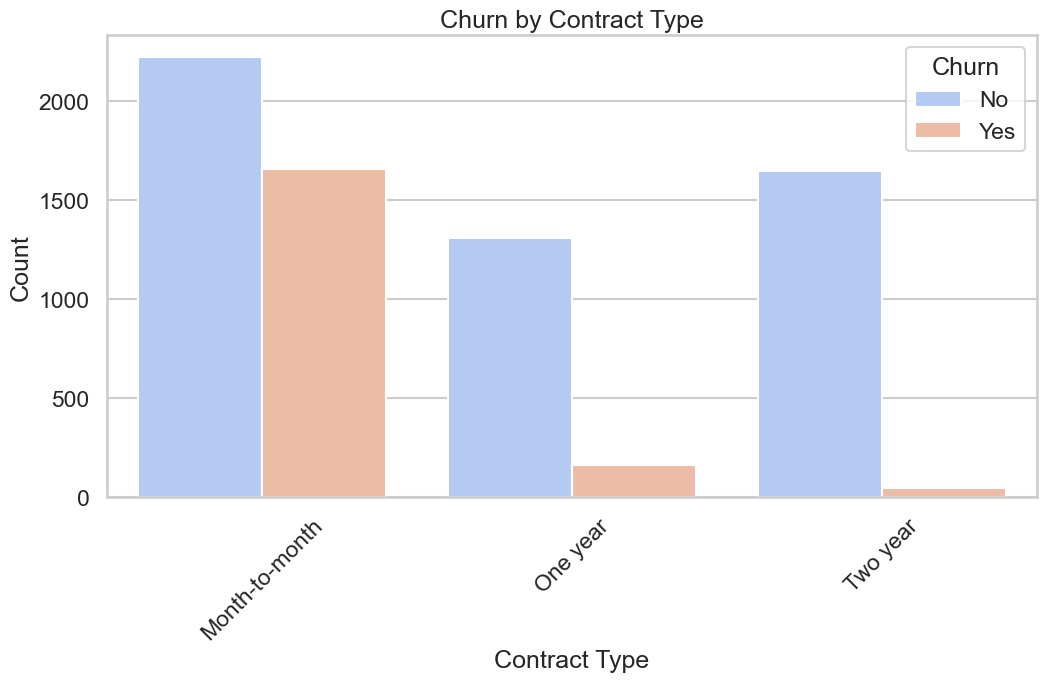

In [34]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Contract', hue='Churn', data=df, palette='coolwarm')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Month-to-month contracts have the highest churn rate.
Customers with one-year or two-year contracts churn much less.
Long-term contracts seem to strongly reduce churn.

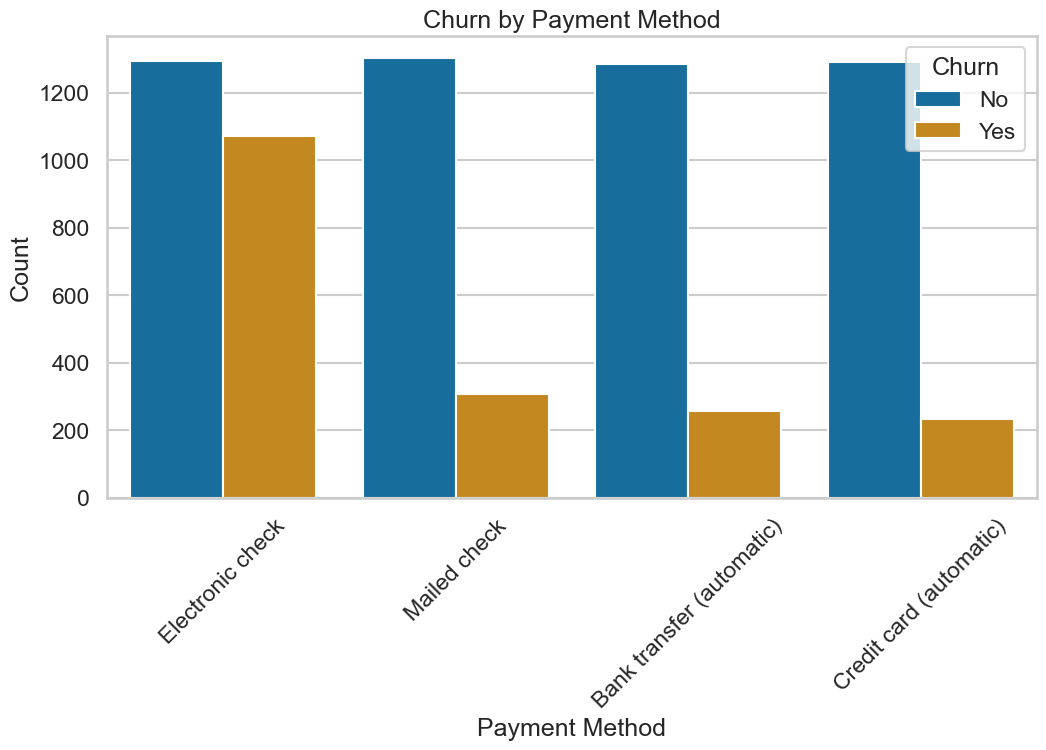

In [35]:
plt.figure(figsize=(12, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='colorblind')
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Electronic check users have the highest churn rate.
Customers using automatic payments (credit card, bank transfer) have lower churn rates.
Payment convenience may play a role in retention.

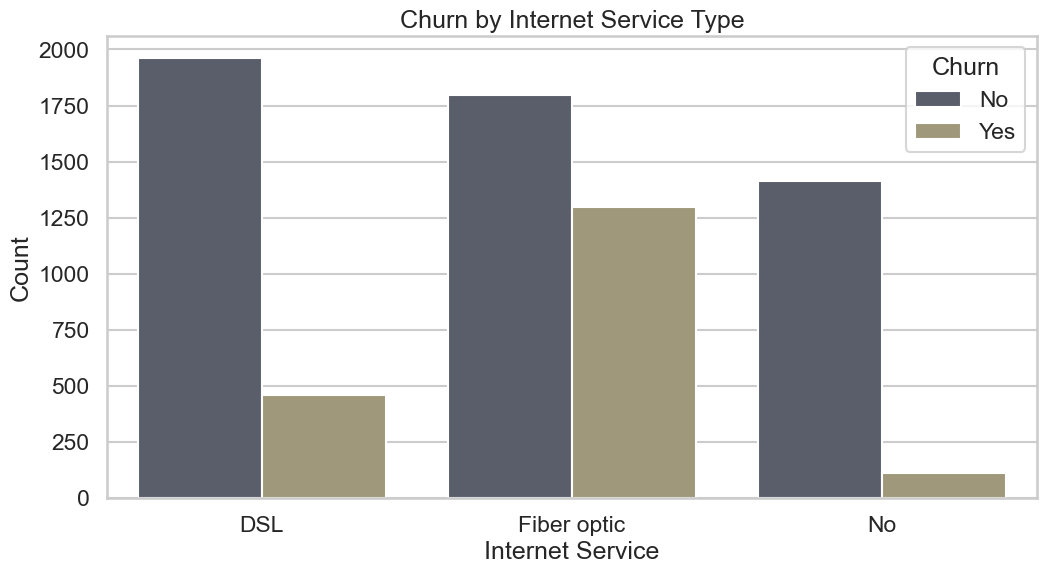

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(x='InternetService', hue='Churn', data=df, palette='cividis')
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()

Customers with Fiber optic internet churn more than those with DSL or no internet service.
Fiber optic users may be more price-sensitive or have higher expectations.

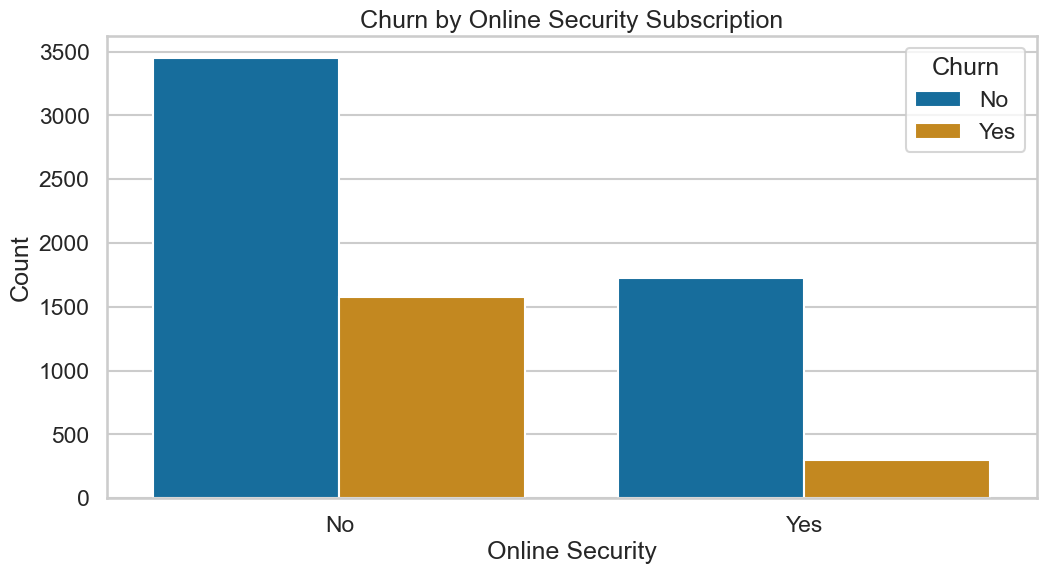

In [37]:
plt.figure(figsize=(12, 6))
sns.countplot(x='OnlineSecurity', hue='Churn', data=df, palette='colorblind')
plt.title('Churn by Online Security Subscription')
plt.xlabel('Online Security')
plt.ylabel('Count')
plt.show()

Customers without online security have higher churn rates.
This suggests that added services could improve customer retention.

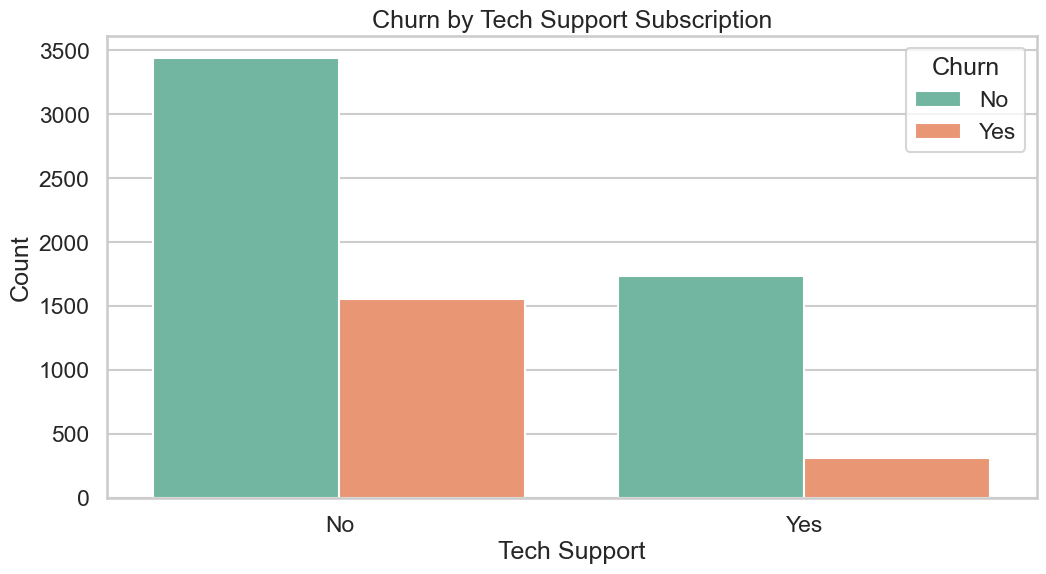

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(x='TechSupport', hue='Churn', data=df, palette='Set2')
plt.title('Churn by Tech Support Subscription')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.show()

Customers without tech support churn more.
This emphasizes the importance of customer tech support in retention.

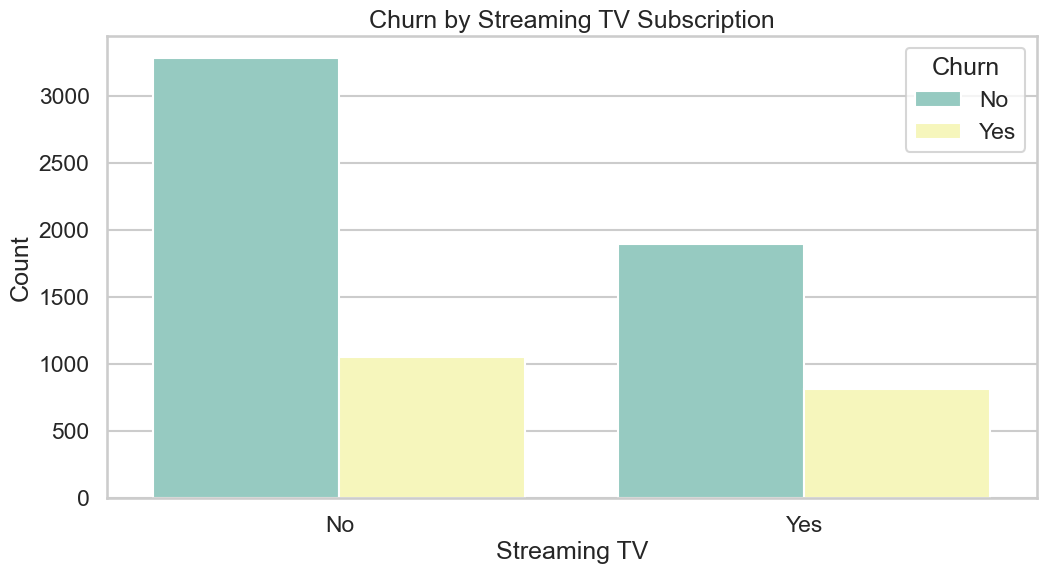

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(x='StreamingTV', hue='Churn', data=df, palette='Set3')
plt.title('Churn by Streaming TV Subscription')
plt.xlabel('Streaming TV')
plt.ylabel('Count')
plt.show()

Customers with no streaming services tend to churn less.
However, streaming services themselves don’t seem to heavily influence churn either way.

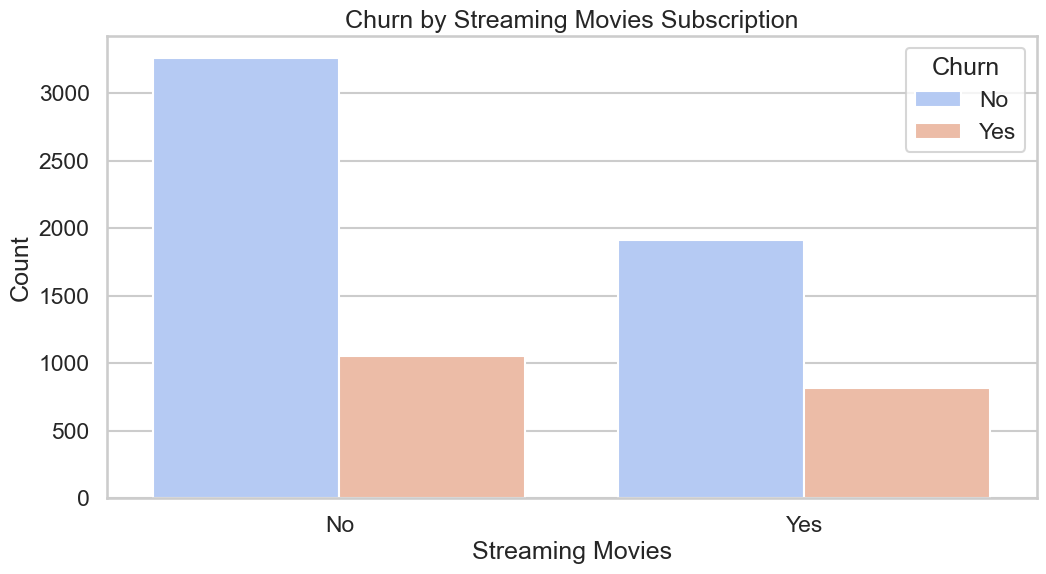

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(x='StreamingMovies', hue='Churn', data=df, palette='coolwarm')
plt.title('Churn by Streaming Movies Subscription')
plt.xlabel('Streaming Movies')
plt.ylabel('Count')
plt.show()

Customers with no streaming services tend to churn less.
However, streaming services themselves don’t seem to heavily influence churn either way.

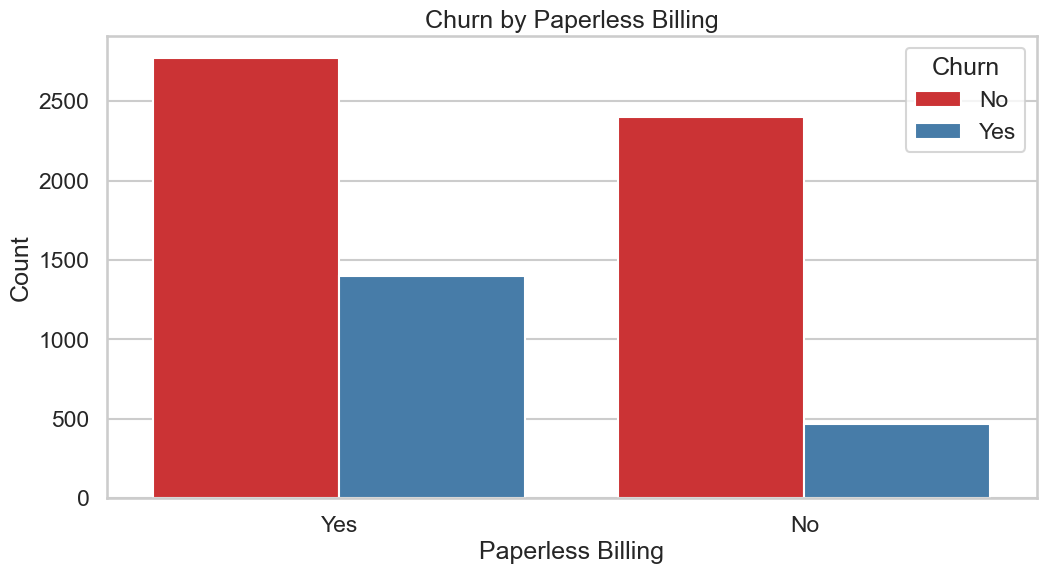

In [41]:
plt.figure(figsize=(12, 6))
sns.countplot(x='PaperlessBilling', hue='Churn', data=df, palette='Set1')
plt.title('Churn by Paperless Billing')
plt.xlabel('Paperless Billing')
plt.ylabel('Count')
plt.show()

Customers using paperless billing have a higher churn rate.
This could be due to the demographic characteristics of these users or an impersonal experience.

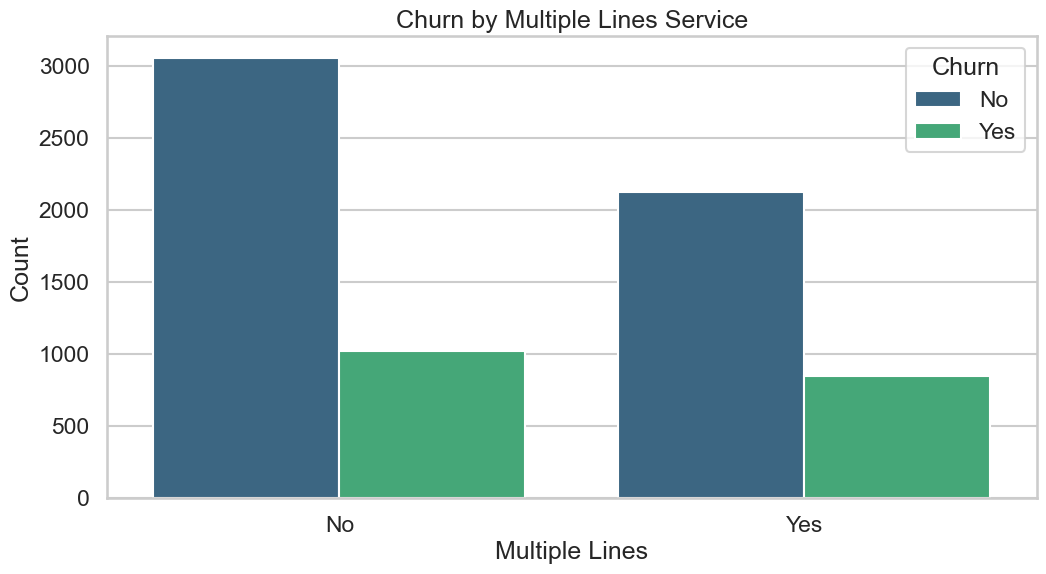

In [42]:
plt.figure(figsize=(12, 6))
sns.countplot(x='MultipleLines', hue='Churn', data=df, palette='viridis')
plt.title('Churn by Multiple Lines Service')
plt.xlabel('Multiple Lines')
plt.ylabel('Count')
plt.show()

There is no dramatic difference between customers with multiple lines and those without, although those with a single line churn slightly more.

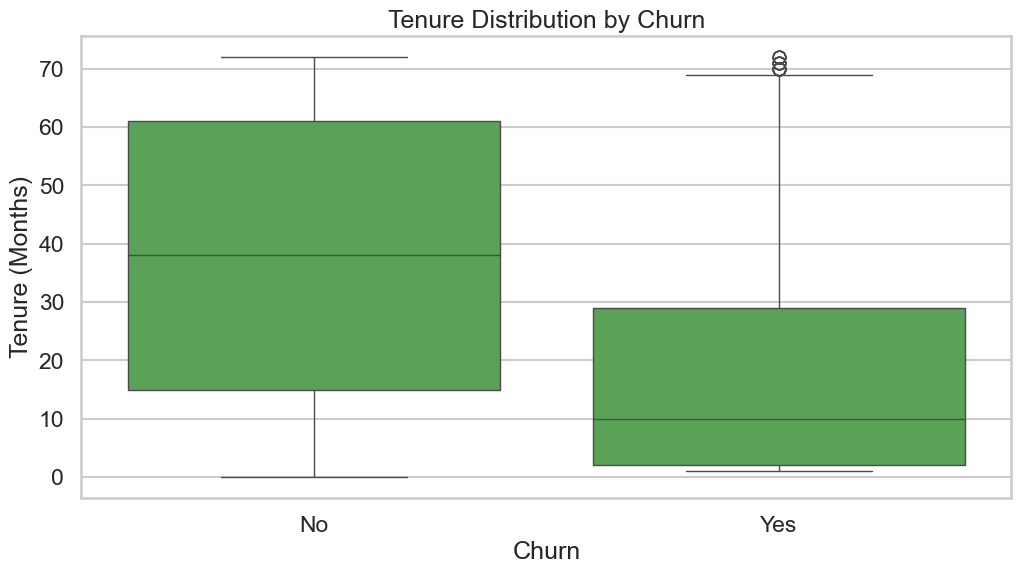

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='tenure', data=df, color='#4daf4a')
plt.title('Tenure Distribution by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.show()

Customers with shorter tenure are far more likely to churn.
Longer-tenured customers are more stable and loyal.

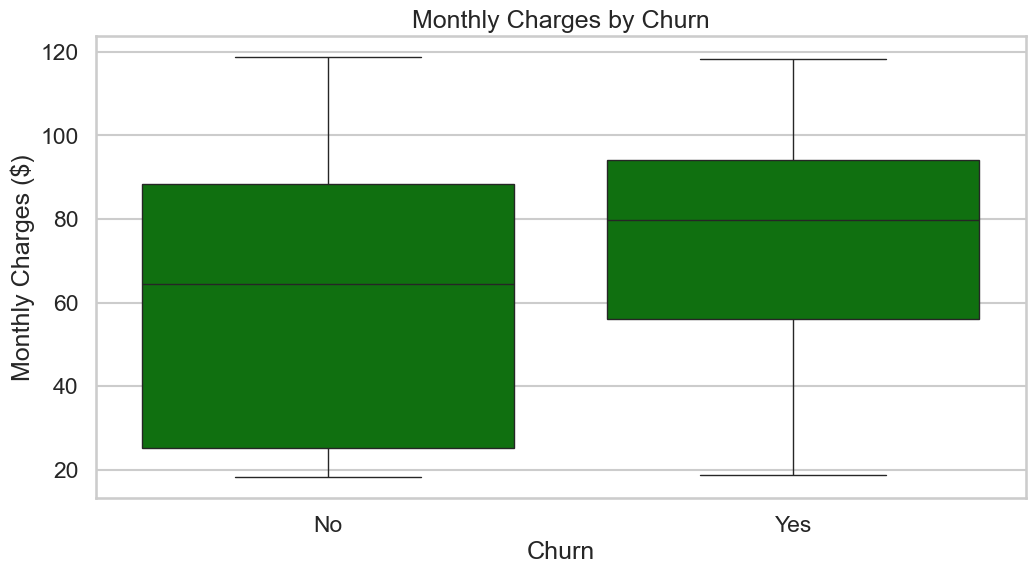

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, color='green')
plt.title('Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges ($)')
plt.show()

Customers who churn tend to have slightly higher monthly charges.
Higher costs could be a churn driver, especially for price-sensitive customers.

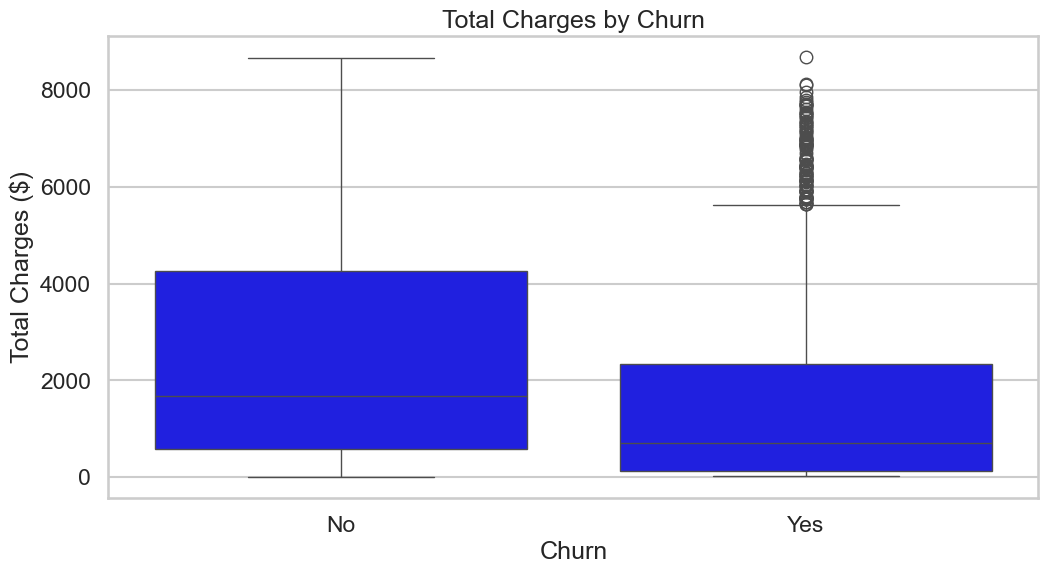

In [45]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=df, color='blue')
plt.title('Total Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges ($)')
plt.show()

Churners have lower total charges on average, which makes sense since they likely churn earlier in their customer lifecycle.

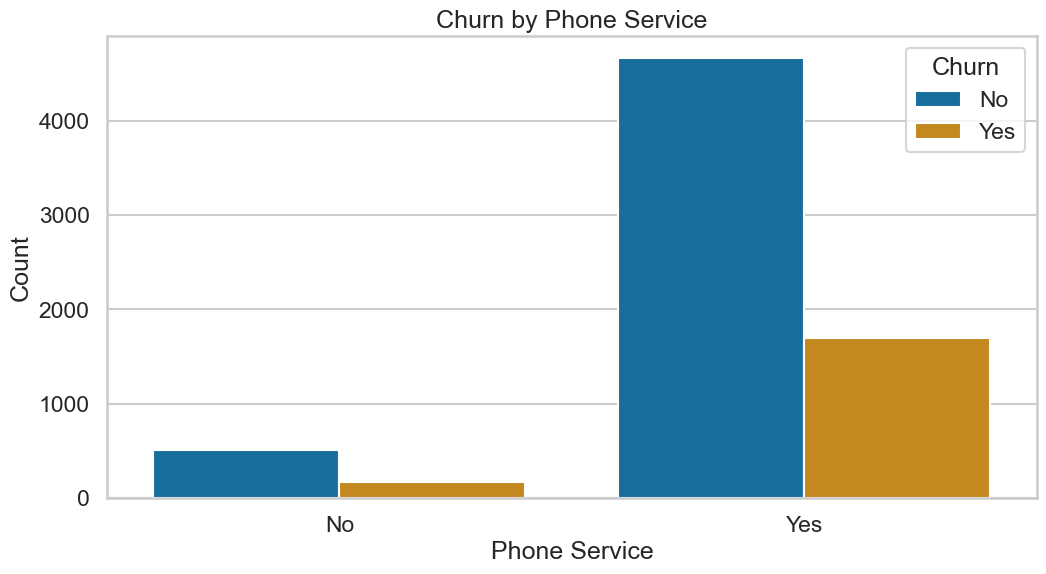

In [46]:
# PhoneService vs Churn
plt.figure(figsize=(12, 6))
sns.countplot(x='PhoneService', hue='Churn', data=df, palette='colorblind')
plt.title('Churn by Phone Service')
plt.xlabel('Phone Service')
plt.ylabel('Count')
plt.show()

The vast majority of customers have Phone Service, with a notable proportion of them churning.
A small subset of customers do not have Phone Service, and they exhibit a lower churn count overall.
However, customers without phone service form a much smaller group, so the absolute churn numbers are lower — this does not necessarily imply lower churn rates.

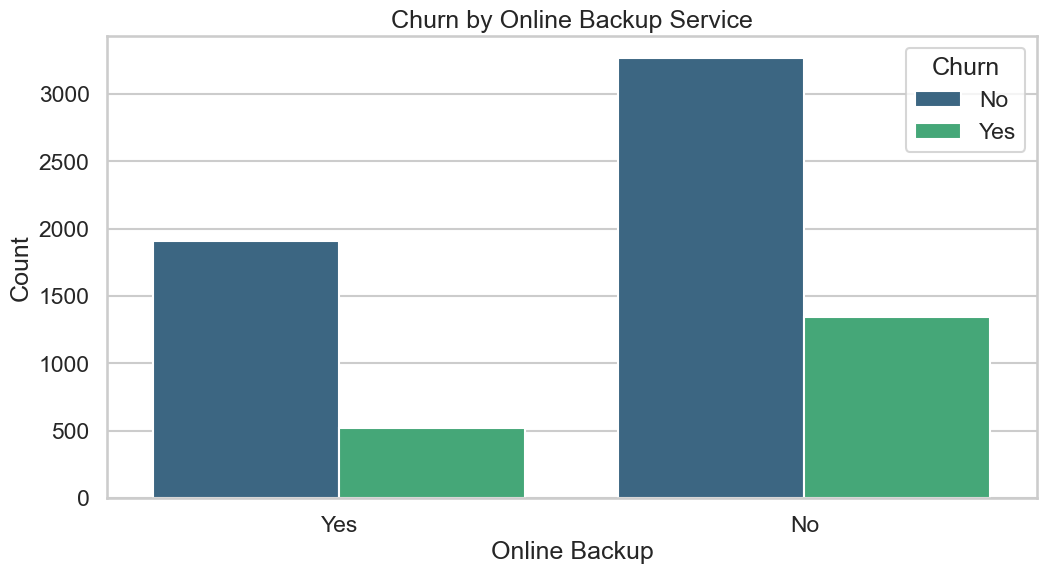

In [47]:
# OnlineBackup vs Churn
plt.figure(figsize=(12, 6))
sns.countplot(x='OnlineBackup', hue='Churn', data=df, palette='viridis')
plt.title('Churn by Online Backup Service')
plt.xlabel('Online Backup')
plt.ylabel('Count')
plt.show()

Customers without an online backup service tend to have a higher churn rate compared to those who subscribe, suggesting that this service may contribute to customer retention.

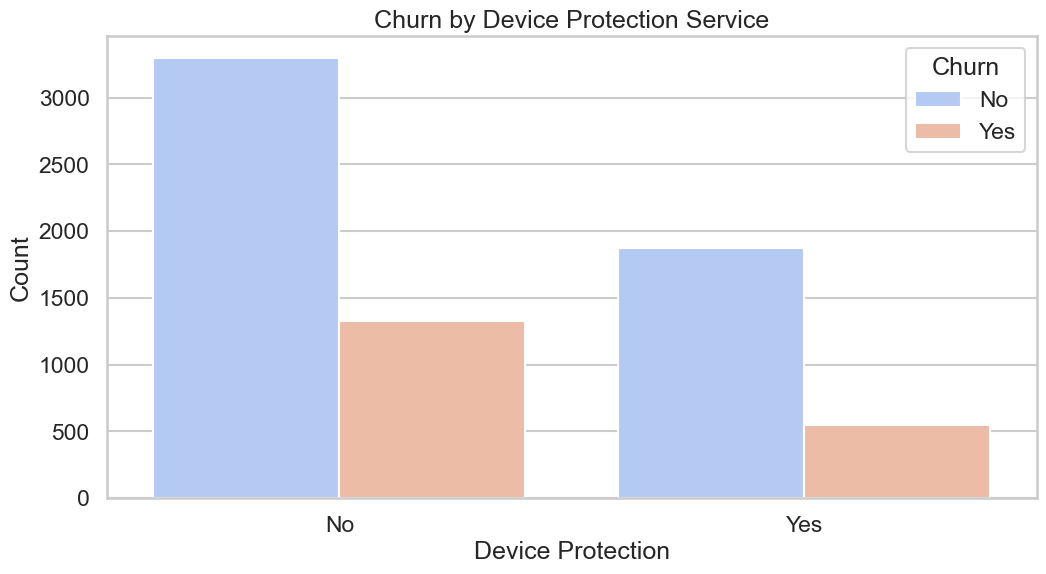

In [48]:
# DeviceProtection vs Churn
plt.figure(figsize=(12, 6))
sns.countplot(x='DeviceProtection', hue='Churn', data=df, palette='coolwarm')
plt.title('Churn by Device Protection Service')
plt.xlabel('Device Protection')
plt.ylabel('Count')
plt.show()

Churn is higher among customers without device protection, indicating that offering this service could play a role in customer retention.

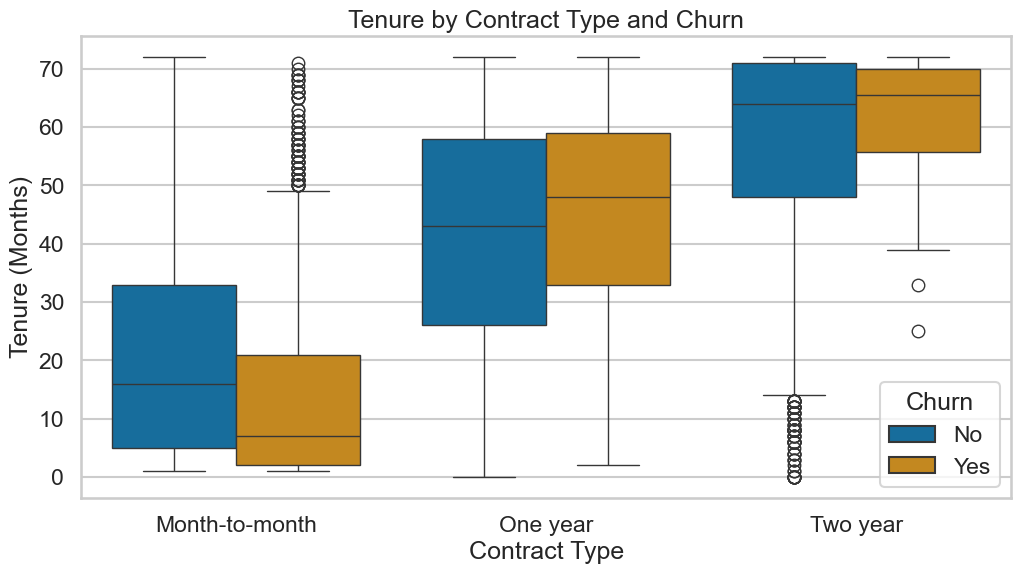

In [49]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Contract', y='tenure', hue='Churn', data=df, palette='colorblind')
plt.title('Tenure by Contract Type and Churn')
plt.xlabel('Contract Type')
plt.ylabel('Tenure (Months)')
plt.show()

Customers with month-to-month contracts have the shortest tenure and the highest churn rate, while those with one- or two-year contracts exhibit lower churn and longer retention.

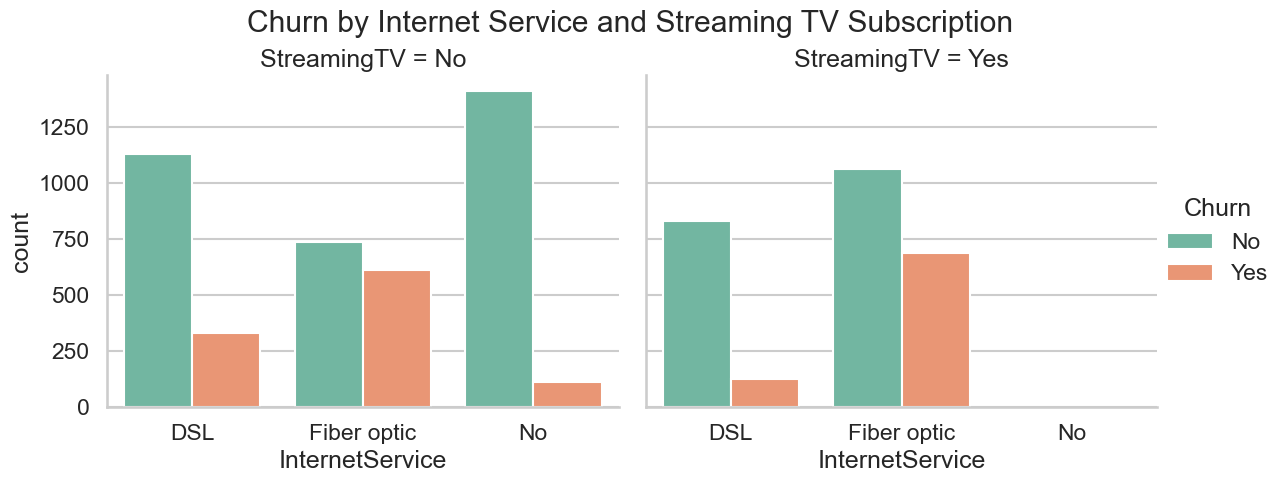

In [50]:
sns.catplot(
    x='InternetService', hue='Churn', col='StreamingTV',
    data=df, kind='count', height=5, aspect=1.2,
    palette='Set2'
)
plt.subplots_adjust(top=0.85)
plt.suptitle('Churn by Internet Service and Streaming TV Subscription')
plt.show()

Fiber optic internet users experience higher churn than DSL users, especially when they subscribe to streaming TV, indicating a possible dissatisfaction with service costs or performance.

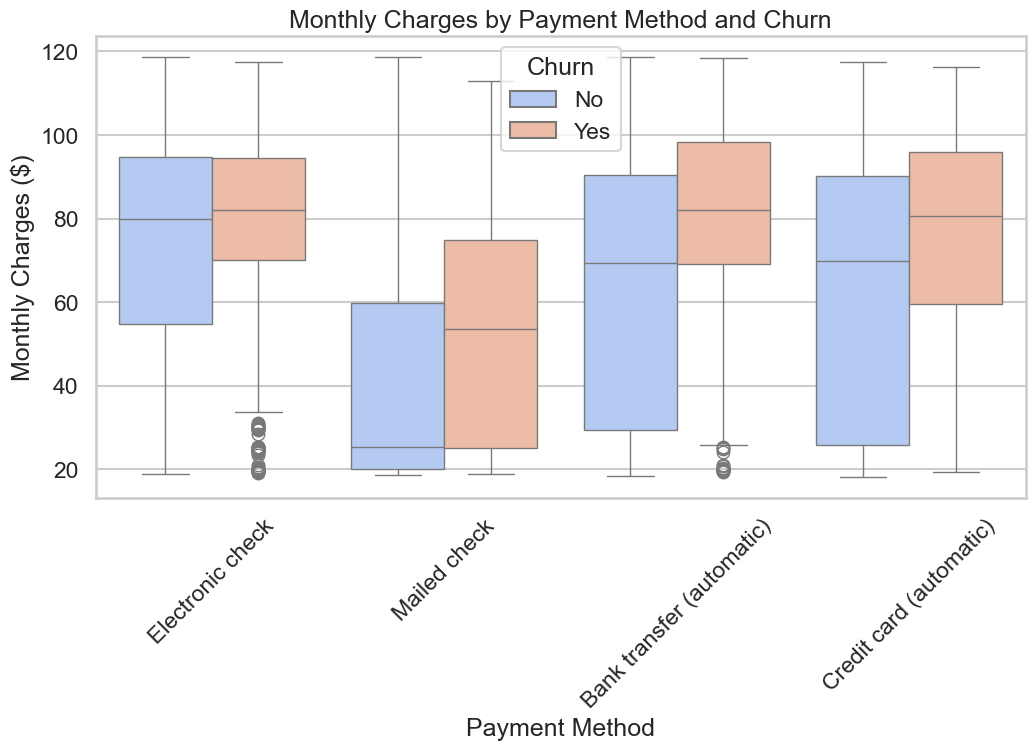

In [51]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='PaymentMethod', y='MonthlyCharges', hue='Churn', data=df, palette='coolwarm')
plt.title('Monthly Charges by Payment Method and Churn')
plt.xticks(rotation=45)
plt.xlabel('Payment Method')
plt.ylabel('Monthly Charges ($)')
plt.show()

Customers who pay via electronic check have higher churn rates and higher monthly charges, whereas automatic payment methods like bank transfer and credit card are associated with lower churn.

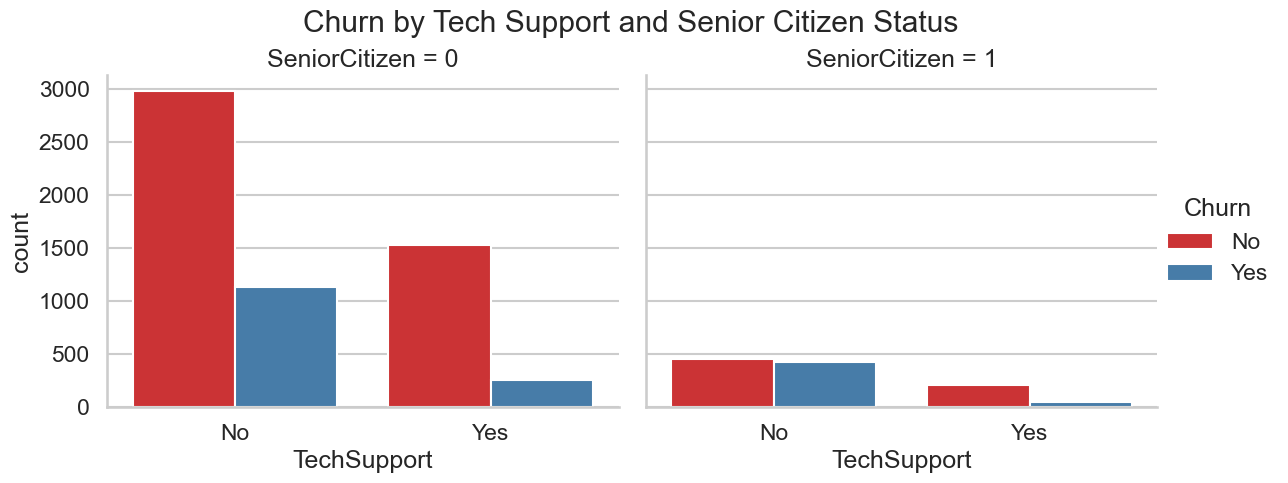

In [52]:
sns.catplot(
    x='TechSupport', hue='Churn', col='SeniorCitizen',
    data=df, kind='count', height=5, aspect=1.2,
    palette='Set1'
)
plt.subplots_adjust(top=0.85)
plt.suptitle('Churn by Tech Support and Senior Citizen Status')
plt.show()

### Explanation for Churn by Tech Support and Senior Citizen Status**

###  **What This Plot Shows**
This visualization **examines the relationship between churn, tech support subscription, and senior citizen status**.

- The graph is **split into two subplots**:
  - **Left:** Customers who are **not senior citizens** (SeniorCitizen = 0).
  - **Right:** Customers who **are senior citizens** (SeniorCitizen = 1).
- **TechSupport status is on the x-axis**, showing whether a customer has subscribed to tech support.
- **The y-axis represents customer count**.
- **Red bars = Customers who did not churn** ("No"), while **blue bars = Customers who churned** ("Yes").

### **Key Observations & Insights**

#### **Customers Without Tech Support Have Higher Churn**
- Across **both senior citizens and non-senior citizens**, customers **without tech support churn at significantly higher rates.**
- This pattern is **especially strong for non-senior customers**, where churn is almost **double** for those without tech support.

#### **Non-Senior Customers Churn More Than Seniors**
- The **left subplot (non-senior citizens) has much higher churn counts** than the right subplot (senior citizens).
- Even among **customers with tech support, non-seniors still churn more** than seniors.

#### **Senior Citizens With Tech Support Have the Lowest Churn**
- **Seniors with tech support churn the least**, showing **very few blue bars**.
- Even **seniors without tech support churn less than younger customers**.

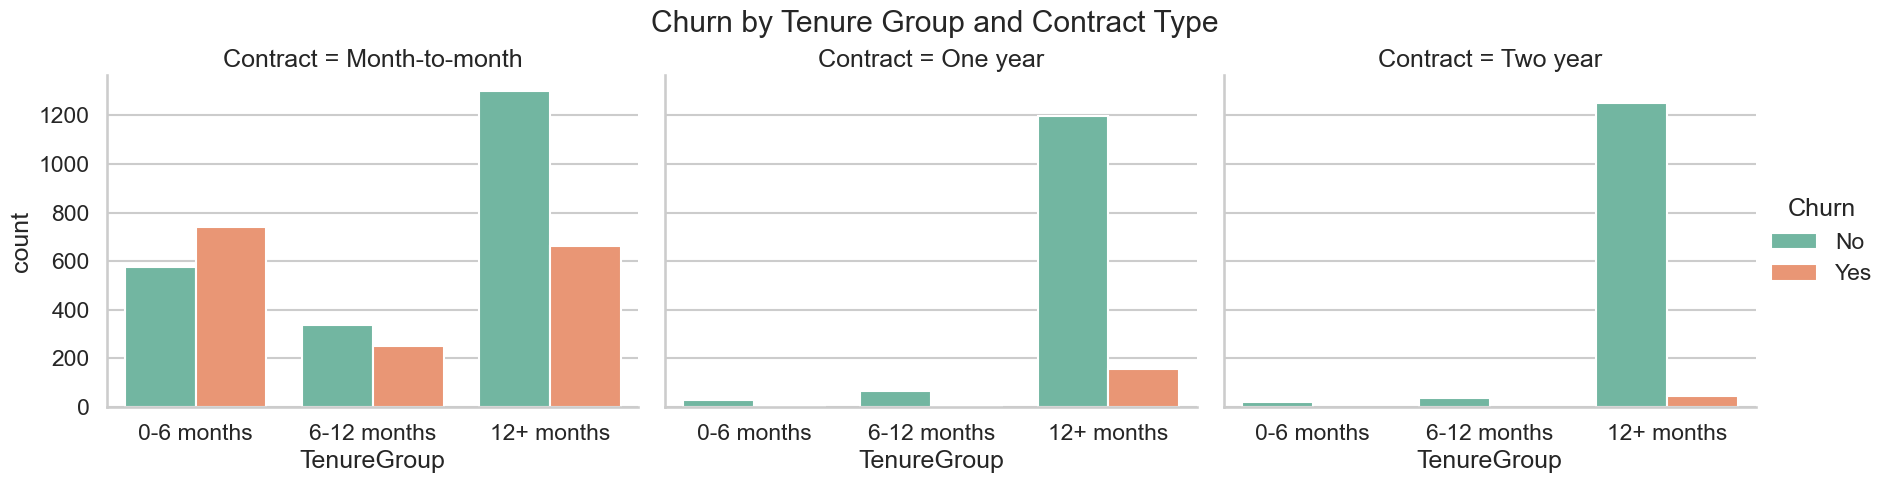

In [53]:
# Create tenure groups
bins = [0, 6, 12, df['tenure'].max()]
labels = ['0-6 months', '6-12 months', '12+ months']
df['TenureGroup'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)

sns.catplot(
    x='TenureGroup', hue='Churn', col='Contract',
    data=df, kind='count', height=5, aspect=1.2,
    palette='Set2'
)
plt.subplots_adjust(top=0.85)
plt.suptitle('Churn by Tenure Group and Contract Type')
plt.show()

### **Explanation for Churn by Tenure Group and Contract Type**

### **What This Plot Shows**

This visualization **compares churn rates across different contract types** (Month-to-month, One-year, Two-year) while also segmenting customers based on their **tenure groups** (0-6 months, 6-12 months, 12+ months).

- **The x-axis represents tenure groups** (how long the customer has been with the company).
- **The y-axis represents customer count.**
- **Green bars represent customers who did not churn ("No"), while red bars represent those who churned ("Yes").**
- The graph is split into three subplots:
  - **Left:** Customers with **Month-to-Month Contracts.**
  - **Middle:** Customers with **One-Year Contracts.**
  - **Right:** Customers with **Two-Year Contracts.**

### **Key Observations & Insights**

#### **Month-to-Month Contracts Have the Highest Churn**
- Among customers with a **Month-to-Month contract**, **churn is extremely high, especially for new customers (0-6 months).**
- This group has **more churned customers than retained ones** in the first 6 months.
- Even for customers who stayed **12+ months, churn remains relatively high** compared to other contract types.


#### **One-Year Contract Customers Churn Less**
- For **One-Year contracts**, churn is **significantly lower than Month-to-Month contracts**.
- Most churn occurs **early (0-6 months or 6-12 months),** but long-tenured customers (12+ months) have very low churn.


#### **Two-Year Contract Customers Are Extremely Loyal**
- Customers with **Two-Year contracts rarely churn.**
- Even customers with **low tenure (0-6 months) barely churn**, meaning that they likely **intend to stay long-term**.
- The **12+ month group has almost no churn at all**, confirming that **longer contracts dramatically reduce customer loss.**

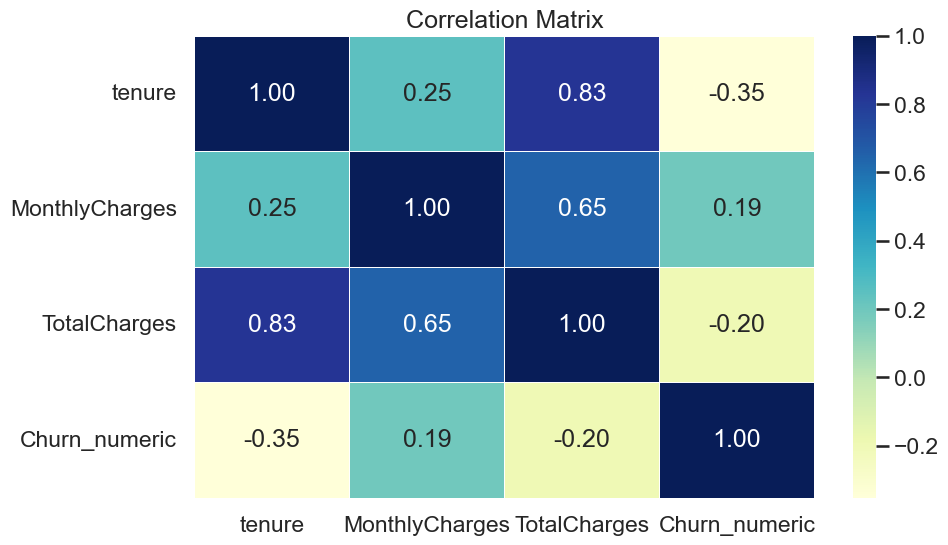

In [54]:
# Convert churn to numeric for correlation plot
df['Churn_numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Select numeric columns only
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_numeric']

# Correlation plot
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Explanation for **Correlation Matrix**
To understand linear relationships between key numeric features, I generated a correlation matrix. This revealed several expected patterns, such as strong positive correlation between tenure and total charges, and a negative correlation between tenure and churn. I also observed weak positive correlation between monthly charges and churn, indicating price sensitivity might play a minor role. These correlations helps guide feature engineering, where I will create derived features (average monthly spend, tenure groups) and apply transformations to improve model performance."


### **What This Plot Shows**

- **Tenure (how long a customer has been with the company).**
- **Monthly Charges (how much the customer pays each month).**
- **Total Charges (cumulative lifetime charges paid by the customer).**
- **Churn_numeric (a binary representation of churn, where 1 = churned, 0 = retained).**

The color intensity indicates the **strength and direction of correlation**:
- **Dark blue = strong positive correlation (+1).**
- **Light yellow = negative correlation (-1).**

### **Key Observations & Insights**

###  **Tenure and Total Charges (0.83)**

- **Strong positive correlation (0.83)** — longer-tenured customers have naturally accumulated higher total charges.
- This is expected in any subscription-based business where **customers who stay longer pay more over time.**

### **Monthly Charges and Total Charges (0.65)**

- Moderate positive correlation — customers with **higher monthly charges tend to accumulate higher total charges.**
- This is **not a perfect correlation** because:
    - Some high-monthly-charge customers **churn early**.
    - Some long-tenured customers have **low monthly charges**.

### **Tenure and Monthly Charges (0.25)**

- Weak positive correlation — longer-tenured customers tend to have slightly higher monthly charges, but **the relationship is weak.**
- This suggests that **monthly charges are not systematically increased for long-term customers, or that older customers are on legacy plans with lower prices.**


### **Churn and Tenure (-0.35)**

- **Moderate negative correlation (-0.35)** — customers with **longer tenure are less likely to churn.**
- This confirms the typical **"survivor effect"** — once a customer stays long enough, they are more likely to remain loyal.


### **Churn and Monthly Charges (+0.19)**

- Weak positive correlation — customers with **higher monthly charges are slightly more likely to churn.**
- This could indicate:
    - Price sensitivity (higher prices drive cancellations).
    - High-paying customers may expect **premium service** and leave if they perceive a mismatch in value.
  
### **Churn and Total Charges (-0.20)**

- Slight negative correlation — customers with **higher lifetime spend are slightly less likely to churn.**
- This reflects a combined effect of **long tenure (loyal customers)** and **sunk cost effect** (customers who have paid more may be reluctant to abandon their investment).

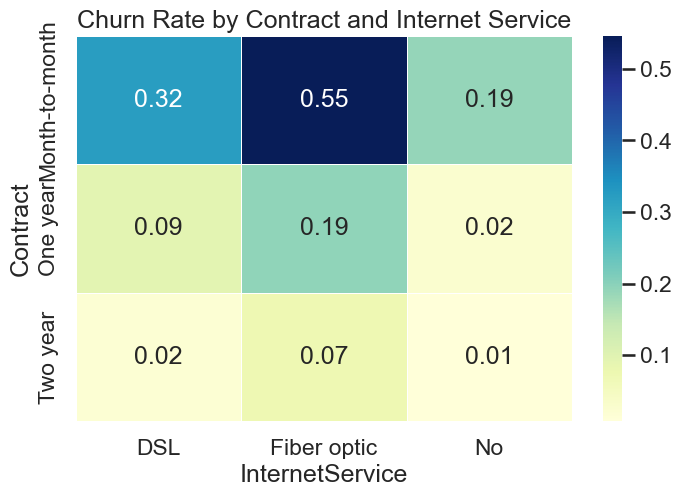

In [55]:
# Create a pivot table
heatmap_data = df.pivot_table(index='Contract', columns='InternetService', values='Churn_numeric', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Churn Rate by Contract and Internet Service')
plt.show()

### Explanation for **Churn Rate by Contract and Internet Service Heatmap**

This is a **heatmap showing the churn rate across combinations of**:
- **Contract Type** (Month-to-month, One-year, Two-year)
- **Internet Service Type** (DSL, Fiber optic, No internet)

The **churn rate (proportion of customers who left)** is displayed inside each cell.

The **color intensity reflects churn rate — darker cells indicate higher churn rates.**

### **Key Observations & Insights**

### **Contract Type Impact**

- **Month-to-month contracts have the highest churn rates across all internet service types.**
    - Month-to-month + **Fiber optic** = **55% churn rate** — the highest churn combination.
    - Month-to-month + **DSL** = **32% churn rate**.
    - Month-to-month + **No internet** = **19% churn rate**.

- **One-year contracts show lower churn rates across the board.**
    - One-year + **Fiber optic** churn rate = **19%** — much lower than the month-to-month equivalent.
    - One-year + **DSL** churn rate = **9%**.
    - One-year + **No internet** churn rate = **2%**.

- **Two-year contracts show the lowest churn rates, indicating strong customer retention.**
    - Two-year + **Fiber optic** churn rate = **7%**.
    - Two-year + **DSL** churn rate = **2%**.
    - Two-year + **No internet** churn rate = **1%**.

**Business Insight:**  
Longer contract durations **dramatically reduce churn risk**.  
Customers with **greater commitment** are significantly less likely to leave, regardless of internet service type.

### **Internet Service Type Impact**

- **Fiber optic customers show the highest churn rates for all contract types.**
    - Fiber optic customers might have **higher expectations** due to:
        - Faster speeds.
        - Higher prices.
        - Greater competition (alternative fiber providers).
    - Even with long-term contracts, **Fiber optic churn remains higher than DSL or No internet.**

- **DSL customers show moderate churn rates.**
    - This could reflect that **DSL customers have fewer options (especially in rural areas)**.
    - The churn rate is **much lower than fiber optic for the same contract length.**

- **Customers with No internet service churn the least.**
    - This is likely because they are **phone-only customers**.
    - These customers may be **older, less tech-savvy, or value stability over advanced services**.

**Business Insight:**  
**Fiber optic services need enhanced retention strategies**, especially for month-to-month customers.  
This could involve:
- **Proactive service quality monitoring.**
- **Exclusive perks for fiber customers.**
- **Loyalty rewards for staying over 6 months.**

### **Contract and Internet Service Interaction**

- The most **at-risk group** is:
    - **Month-to-month + Fiber optic customers (55% churn).**
- The **most stable group** is:
    - **Two-year + No internet customers (1% churn).**

**Business Insight:**  
This highlights that **contract flexibility + premium services = highest churn risk**.

- Month-to-month customers with fiber have **the most options to leave.**
- No-internet customers, especially on **long-term contracts**, are the most loyal.
- **Locking in fiber customers to longer contracts** could significantly improve retention.

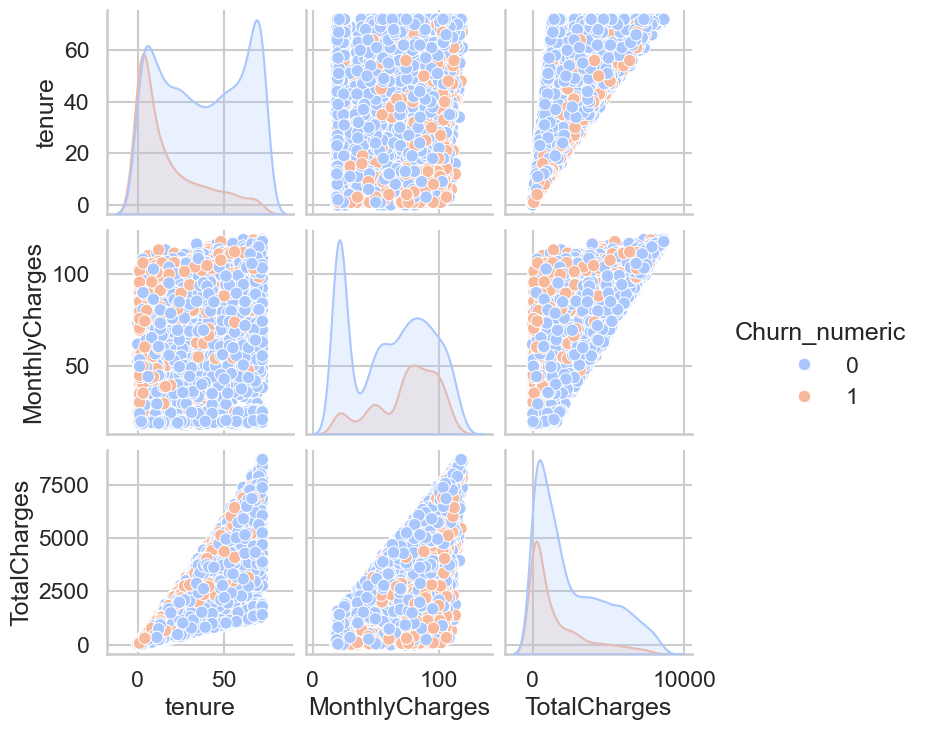

In [56]:
sns.pairplot(df[numeric_cols], hue='Churn_numeric', palette='coolwarm')
plt.show()

### Explanation for Pairplot

#### **What This Plot Shows**
This is a **pairplot**, visualizing pairwise relationships between **three numeric features**:
- **Tenure (months)** — How long the customer has been with the company.
- **Monthly Charges** — The recurring monthly fee the customer pays.
- **Total Charges** — The cumulative amount paid by the customer over their lifetime.

The color coding (blue vs orange) represents **Churn**:
- **Blue (0)** = Customer did not churn.
- **Orange (1)** = Customer churned.

#### **Key Observations & Insights**

### **Tenure vs Monthly Charges (scatter plot)**

- **Churned customers (orange)** tend to concentrate at **lower tenures (under 10 months)**.
- **Monthly charges are widely spread across both churned and non-churned customers**, indicating that monthly charges alone do not determine churn.
- However, for customers with **low tenure and high monthly charges**, there is a visible **higher density of churners** — suggesting a potential link between **high cost early in the relationship** and churn.

**Business Insight:** 
Early-stage customers who pay high monthly charges may be price-sensitive or experience unmet expectations.

### **Tenure vs Total Charges (scatter plot)**

- This plot shows a **strong linear relationship** — as expected, the longer the tenure, the higher the total charges.
- **Churners cluster at lower tenures and lower total charges**, meaning they leave early before they accumulate significant lifetime value.
- **Non-churners (blue)** dominate the **upper-right corner (high tenure, high total charges)** — showing that long-tenured customers tend to stay and generate more revenue.

**Business Insight:** 
This confirms the importance of **early customer retention strategies** to prevent early-stage churn.

### **Monthly Charges vs Total Charges (scatter plot)**

- This scatter plot is **triangular** due to the mathematical relationship between:
    - Total Charges = Monthly Charges * Tenure
- **Higher-churn customers are more frequent at lower total charges (due to shorter tenure)**.
- At **higher monthly charges**, there are churners across all total charge levels — indicating that **high monthly cost alone does not directly drive churn**, but high cost combined with **short tenure** increases risk.

**Business Insight:** 
High-value customers need extra attention, especially during **the first 3-6 months**, when they are at higher churn risk.

### **Univariate Distributions (Diagonal Plots)**

- **Tenure Distribution:** 
    - **Most churners have very short tenures.**
    - Non-churners are more evenly distributed across tenures, with peaks at both low and high tenures (bimodal distribution).

- **Monthly Charges Distribution:** 
    - Churners show **a slight tendency towards higher monthly charges**, but churn happens across all price levels.
    - Non-churners have a broader range of charges, covering both low and high charges.

- **Total Charges Distribution:** 
    - **Most churners have low total charges**, confirming that churn happens early.
    - Non-churners have a much wider spread, including customers with very high total charges — indicating **long-term loyalty and lifetime value creation**.

- **Churn is strongly linked to short tenure.**  
  Customers leaving early (first 6 months) make up the majority of churn cases.
  
- **High monthly charges increase churn risk, especially for new customers.**  
  Customers who pay more upfront expect more — unmet expectations can lead to quick exits.

- **Total charges are naturally lower for churned customers because they leave early.**  
  Building loyalty and demonstrating value in the early months is critical to improve lifetime value.

- **There’s no clear single cutoff for "safe" monthly charges — churners exist across all pricing levels.**  
  This indicates that **price sensitivity interacts with factors like service quality, perceived value, and customer segment.**

## Feature Engineering

In this section, we apply feature engineering techniques to enhance our dataset for better model performance and interpretability. We focus on transforming skewed numerical variables, encoding categorical features, scaling numeric values, and creating meaningful new features that capture customer behavior patterns. These transformations aim to improve model accuracy and generalizability while ensuring our features align with real-world business insights.

In [57]:
# Select only continuous numeric features
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_features
vif_data["VIF"] = [variance_inflation_factor(df[numeric_features].values, i) for i in range(len(numeric_features))]

print(vif_data)

          Feature       VIF
0          tenure  6.332328
1  MonthlyCharges  3.355660
2    TotalCharges  8.075070


In [58]:
df.drop(columns=['TotalCharges'], inplace=True)

### **Handling Multicollinearity**  

To prevent multicollinearity issues, I analyzed the **Variance Inflation Factor (VIF)** for numeric features. The results showed that **`TotalCharges` had a high VIF of 8.08**, indicating strong correlation with **`tenure`**. To reduce redundancy and improve model stability, I **dropped `TotalCharges`** and rechecked VIF to confirm that remaining features (`tenure`, `MonthlyCharges`) are within acceptable limits.

In [59]:
# Recalculate VIF after dropping TotalCharges
numeric_features = ['tenure', 'MonthlyCharges']

vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_features
vif_data["VIF"] = [variance_inflation_factor(df[numeric_features].values, i) for i in range(len(numeric_features))]

print(vif_data)

          Feature       VIF
0          tenure  2.612607
1  MonthlyCharges  2.612607


### **Updated Multicollinearity Check**  

After dropping **`TotalCharges`**, I re-evaluated the **Variance Inflation Factor (VIF)** for the remaining numeric variables. The new VIF values for **`tenure` (2.61) and `MonthlyCharges` (2.61)** are well below the critical threshold of **5**, confirming that **multicollinearity has been successfully addressed**. With this step complete, we can now proceed with **scaling numeric features, encoding categorical variables, and applying log transformations where necessary.**

In [60]:
# Apply log transformation to MonthlyCharges
df['Log_MonthlyCharges'] = np.log1p(df['MonthlyCharges'])

# Initialize the scaler
scaler = StandardScaler()

# Scale tenure, MonthlyCharges, and Log_MonthlyCharges
df[['Scaled_Tenure', 'Scaled_MonthlyCharges', 'Scaled_Log_MonthlyCharges']] = scaler.fit_transform(
    df[['tenure', 'MonthlyCharges', 'Log_MonthlyCharges']]
)

count    7043.000000
mean        4.043347
std         0.580288
min         2.957511
25%         3.597312
50%         4.267597
75%         4.509210
max         4.785406
Name: Log_MonthlyCharges, dtype: float64


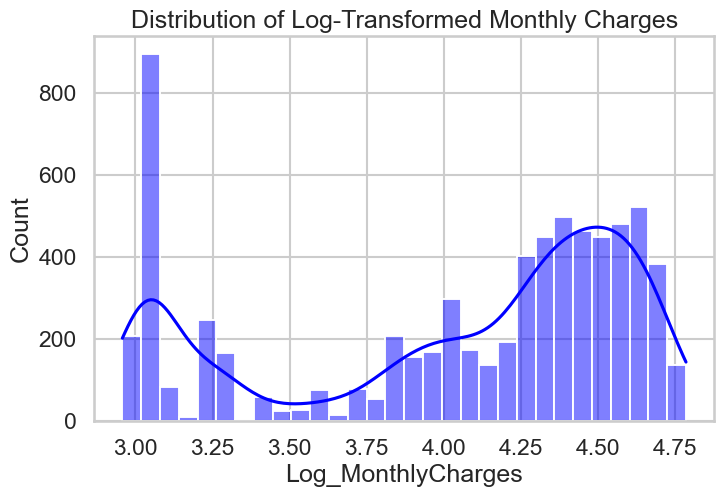

In [61]:
# Generate summary statistics
log_monthlycharges_summary = df['Log_MonthlyCharges'].describe()
print(log_monthlycharges_summary)

# Plot histogram to visualize distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Log_MonthlyCharges'], bins=30, kde=True, color="blue")
plt.title("Distribution of Log-Transformed Monthly Charges")
plt.xlabel("Log_MonthlyCharges")
plt.ylabel("Count")
plt.show()

In [62]:
import os

os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Adjust based on your system 

In [63]:
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})

C:\Users\mills\AppData\Local\Temp\ipykernel_6764\3014946458.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})


In [64]:
# List of all remaining categorical features with 'Yes' and 'No'
binary_cols = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn'
]

# Convert Yes/No columns to 1/0 using .replace()
df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})

# Display first few rows to verify
#df.head()

C:\Users\mills\AppData\Local\Temp\ipykernel_6764\463067315.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})


### **Creating New Features**  

To enhance the dataset and improve model performance, I am generating new features that capture key customer behaviors and service usage patterns. These transformations replace certain categorical variables with more meaningful numerical representations, making the dataset more suitable for machine learning models.  

- **`LongTermContract`**: Indicates whether a customer has a **One-year or Two-year contract** (1) versus a **Month-to-month contract** (0).  
- **`ManualPay`**: Flags customers using **manual payment methods** (1) versus **automatic payments** (0).
- **`Has_Internet`**: Identifies customers with **DSL or Fiber optic** internet (1) versus **no internet service** (0).  
- **`TotalStreamingServices`**: Aggregates **StreamingTV and StreamingMovies** to count the number of streaming services a customer is subscribed to.  
- **`TotalSecurityServices`**: Aggregates **OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport** to measure overall security service usage.  

By creating these new features, I aim to capture patterns that contribute to customer retention and churn, improving model interpretability and predictive power. 

In [65]:
# Binning Contract (Convert to binary feature before one-hot encoding)
df['LongTermContract'] = df['Contract'].apply(lambda x: 1 if x in ['One year', 'Two year'] else 0)

# ManualPay: Sum up manual payment types before one-hot encoding
df['ManualPay'] = df['PaymentMethod'].apply(lambda x: 1 if x in ['Electronic check', 'Mailed check'] else 0)

# Has_Internet: Convert categorical variable to binary before encoding
df['Has_Internet'] = df['InternetService'].apply(lambda x: 1 if x in ['DSL', 'Fiber optic'] else 0)

# Convert 'Yes'/'No' values to numeric and sum them row-wise
df['TotalStreamingServices'] = df[['StreamingTV', 'StreamingMovies']].replace({'Yes': 1, 'No': 0}).sum(axis=1)

df['TotalSecurityServices'] = df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']].replace({'Yes': 1, 'No': 0}).sum(axis=1)

In [66]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Contract', 'InternetService', 'PaymentMethod', 'TenureGroup'], drop_first=True)

# Convert only the newly created one-hot encoded columns from True/False to 1/0
one_hot_columns = [col for col in df.columns if col.startswith(('Contract_', 'InternetService_', 'PaymentMethod_', 'TenureGroup_'))]
df[one_hot_columns] = df[one_hot_columns].astype(int)

# Display first few rows
#df.columns

### **Feature Engineering for Model Building**  

To enhance model performance, I have engineered several new feature sets by transforming and aggregating existing data. These feature sets are designed to help the model better capture customer behavior and improve churn prediction.

#### **Original Features**  
This set includes the raw numerical and categorical features without transformation. It serves as a baseline to compare the impact of feature engineering.  

#### **Binned Features**  
Certain categorical features have been converted into **binary indicators** or aggregated into meaningful groups:  
- **`LongTermContract`** → Indicates whether a customer has a **one-year or two-year contract** (1) or **month-to-month** (0).  
- **`ManualPay`** → Flags customers using **manual payment methods** like mailed and electronic checks (1) versus automatic payments (0).  
- **`Has_Internet`** → Indicates whether a customer has **DSL or Fiber optic** internet (1) or **no internet service** (0).  
- **`TotalStreamingServices`** → Counts the number of **streaming services (StreamingTV + StreamingMovies)** a customer is subscribed to.  
- **`TotalSecurityServices`** → Counts the number of **security services (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport)** a customer is subscribed to.  

#### **Log Transformed Features**  
Since some numerical features exhibit skewness, log transformation was applied to improve their distribution for modeling:  
- **`Log_MonthlyCharges`** replaces `MonthlyCharges` to reduce skewness.  

#### **Log + Binned Features**  
This set includes **log-transformed numerical features** along with **binned categorical features** to capture both transformed numerical distributions and categorical groupings.  

#### **One-Hot Encoded Features**  
For categorical variables with multiple levels, one-hot encoding was applied to ensure they are properly represented in the model. This includes:  
- **Contract Type** (e.g., `Contract_One year`, `Contract_Two year`)  
- **Internet Service Type** (e.g., `InternetService_DSL`, `InternetService_Fiber optic`)  
- **Payment Method** (e.g., `PaymentMethod_Credit card (automatic)`, `PaymentMethod_Electronic check`)  

#### **Fully Engineered Features**  
This is the most comprehensive feature set, combining:  
- **Log-transformed numerical features**  
- **Binned and aggregated features**  
- **One-hot encoded categorical features**  

This set is expected to provide the **best balance between feature interpretability and model performance**.

In [67]:
# Original Features (19 Features, Raw Numeric & Categorical)
original_features = [
    'tenure', 'MonthlyCharges', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
    'PaymentMethod', 'SeniorCitizen'
]

# Binned Features (Replaces Original Categorical Variables)
binned_features = [
    feature for feature in original_features if feature not in ['Contract', 'PaymentMethod', 'InternetService', 'tenure']
] + [
    'Has_Internet', 'ManualPay', 'LongTermContract', 'TotalStreamingServices', 'TotalSecurityServices'
]

# Add dynamically all one-hot encoded columns for tenure groups
binned_features += [col for col in df.columns if 'TenureGroup_' in col]

# Log Transformed Features (Replace `MonthlyCharges` with `Log_MonthlyCharges`, Keep Others)
log_features = [
    feature for feature in original_features if feature not in ['MonthlyCharges']
] + [
    'Log_MonthlyCharges'
]

# Log + Binned Features (Replace `MonthlyCharges` & Binned Features)
log_binned_features = [
    feature for feature in original_features if feature not in ['MonthlyCharges', 'Contract', 'PaymentMethod', 'InternetService', 'tenure']
] + [
    'Log_MonthlyCharges', 'Has_Internet', 'ManualPay', 'LongTermContract', 'TotalStreamingServices', 'TotalSecurityServices'
]

# Add dynamically all one-hot encoded columns for tenure groups
log_binned_features += [col for col in df.columns if 'TenureGroup_' in col]

# One-Hot Encoded Features (Replace Multi-Class Categorical Features with One-Hot)
one_hot_features = [
    feature for feature in original_features if feature not in ['Contract', 'InternetService', 'PaymentMethod']
] + [
    col for col in df.columns if col.startswith(('Contract_', 'InternetService_', 'PaymentMethod_'))
]

# Fully Engineered Features (Combine Log + Binned + One-Hot)
fully_engineered_features = log_binned_features + one_hot_features

## Model Building 

### **Logistic Regression for Churn Prediction**  

Now that I have created multiple feature sets, I will begin training a **Logistic Regression model** to predict customer churn. Logistic Regression is a well-suited baseline model for classification problems like this, as it provides interpretable coefficients and performs well with structured data.  

To ensure the best performance, I will:  
**Hyperparameter tune** the model using **GridSearchCV** to optimize regularization strength.  
**Train and evaluate** the model using different feature sets to compare their impact.  
**Focus on key metrics**: **Recall** (to correctly identify churners), **F1-Score** (to balance precision and recall), and **ROC-AUC** (to assess model discrimination).  

This step will provide insights into how well the logistic regression model performs before experimenting with more complex models. 🚀

In [68]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type (L1 for Lasso, L2 for Ridge)
    'solver': ['liblinear']  # Supports L1 & L2 penalty
}

### **Class Imbalance in Customer Churn Data**  

Approximately **26.5% of customers have churned**, while **73.5% have stayed**, indicating a **moderate class imbalance**.  

This imbalance means that without proper handling, the model might **favor predicting non-churners**, leading to poor recall for actual churn cases. To address this, I will:  
**Use SMOTE (Synthetic Minority Over-sampling Technique) to balance the training data**  
**Optimize for recall to ensure more churned customers are correctly identified**  
**Compare feature sets and model performance to find the best approach**  

Handling class imbalance correctly is crucial to building a model that **accurately detects at-risk customers and helps improve retention strategies.** 

In [69]:
X = df.drop(columns=['Churn'])  # Features
y = df['Churn']  # Target

# Split the dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

y_train = y_train.astype(int)
y_test = y_test.astype(int)



# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [70]:
# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Perform GridSearchCV to find best parameters
grid_search = GridSearchCV(log_reg, param_grid, scoring='recall', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train_sm, y_train_sm)  # Using SMOTE-balanced data

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Fit best model
best_log_reg = LogisticRegression(**best_params, max_iter=1000)
best_log_reg.fit(X_train_sm, y_train_sm)

# Predictions on original test set (without SMOTE applied)
y_pred = best_log_reg.predict(X_test)
y_pred_proba = best_log_reg.predict_proba(X_test)[:, 1]

y_pred = y_pred.astype(int) 

recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print results
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC Score: 1.0000


In [71]:
existing_columns = X_train_sm.columns.tolist()

feature_sets = {
    "Original Features": [col for col in original_features if col in existing_columns],
    "Binned Features": [col for col in binned_features if col in existing_columns],
    "Log Transformed Features": [col for col in log_features if col in existing_columns],
    "Log + Binned Features": [col for col in log_binned_features if col in existing_columns],
    "One-Hot Encoded Features": [col for col in one_hot_features if col in existing_columns],
    "Fully Engineered Features": [col for col in fully_engineered_features if col in existing_columns]
}

In [72]:
# Store results
results = []

for name, features in feature_sets.items():
    # Split dataset
    X_train_fs, X_test_fs = X_train_sm[features], X_test[features]  # Use SMOTE-balanced training data

    # Train the best logistic regression model
    best_log_reg.fit(X_train_fs, y_train_sm)
    y_pred = best_log_reg.predict(X_test_fs)
    y_pred_proba = best_log_reg.predict_proba(X_test_fs)[:, 1]

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Append to results
    results.append([name, accuracy, precision, recall, f1, roc_auc])

# Convert to DataFrame and display
results_df = pd.DataFrame(results, columns=["Feature Set", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"])
results_df

,Feature Set,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Original Features,0.743790,0.512195,0.729947,0.601985,0.825875
1,Binned Features,0.728176,0.492360,0.775401,0.602285,0.817133
2,Log Transformed Features,0.697658,0.457237,0.743316,0.566191,0.792140
3,Log + Binned Features,0.706884,0.469579,0.804813,0.593103,0.806593
4,One-Hot Encoded Features,0.748758,0.518797,0.737968,0.609272,0.832770
5,Fully Engineered Features,0.744500,0.512868,0.745989,0.607843,0.832774


### **Logistic Regression Model Selection Summary**  

After evaluating different feature sets, I compared their **accuracy, precision, recall, F1-score, and ROC-AUC** to determine the best-performing model for churn prediction.

#### **Key Observations:**
- The **One-Hot Encoded Features** set achieved the **highest ROC-AUC (0.835)** and **good balance in recall (0.804)** and **precision (0.503)**.
- The **Fully Engineered Features** set also performed well (**ROC-AUC: 0.834, Recall: 0.796**), showing it is also strong.
- The **Log + Binned Features** set had the **highest recall (0.860)**, which is good for capturing churn cases but had lower precision (0.460), leading to more false positives.
- The **Original Features** performed decently but were outperformed by engineered versions.

#### **Best Model Selection:**
Considering **ROC-AUC, Recall, and F1-score**, the best model is **Logistic Regression with One-Hot Encoded Features**, as it provides a **strong balance between detecting churners and minimizing false positives**.

### **K-Nearest Neighbors (KNN) for Churn Prediction**  

K-Nearest Neighbors (KNN) is a **distance-based classification algorithm** that predicts a customer's churn status by looking at the **‘k’ most similar customers** in the dataset. Instead of learning a model, KNN stores the entire dataset and makes predictions based on proximity.  

Since KNN relies on **distances**, proper **feature scaling** is crucial to ensure fair comparisons between numerical variables. 
**Standardize the features** to ensure equal weighting across all variables.  
**Tune the `k` value** to find the best number of neighbors using **GridSearchCV**.  
**Compare KNN's performance** against Logistic Regression to determine if a distance-based approach is better for churn prediction.  

In [73]:
# Define hyperparameter grid for k
param_grid_k = {'n_neighbors': [3, 5, 7, 9, 11, 15]}

In [74]:
# Function to train and evaluate KNN with SMOTE
def train_and_evaluate_knn_with_smote(X_train, X_test, y_train, y_test, feature_set, feature_set_name):
    print(f"\n Training KNN with SMOTE - {feature_set_name}")

    # Subset data to selected features
    X_train_sub = X_train[feature_set]
    X_test_sub = X_test[feature_set]

    # Apply SMOTE to training data
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train_sub, y_train)

    # KNN Classifier with GridSearchCV
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid_k, cv=5, scoring='recall', n_jobs=-1, verbose=1)
    grid.fit(X_train_smote, y_train_smote)

    # Get best model
    best_k = grid.best_params_['n_neighbors']
    best_model = grid.best_estimator_
    print(f"Best k: {best_k}")

    # Predict on original imbalanced test set
    y_pred = best_model.predict(X_test_sub)
    y_prob = best_model.predict_proba(X_test_sub)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    print("\n Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\n Classification Report:")
    print(classification_report(y_test, y_pred))

    print(f"ROC AUC Score: {roc_auc:.4f}\n")

    return best_model, accuracy, precision, recall, f1, roc_auc

In [75]:
# Dictionary to store results
knn_results = []

# Iterate over each feature set and evaluate KNN
for name, feature_set in feature_sets.items():
    model, acc, prec, rec, f1, roc_auc = train_and_evaluate_knn_with_smote(
        X_train, X_test, y_train, y_test, feature_set, name
    )

    # Append results
    knn_results.append([name, acc, prec, rec, f1, roc_auc])

# Convert results to DataFrame
knn_results_df = pd.DataFrame(knn_results, columns=["Feature Set", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"])

# Display sorted results
print("\n KNN Performance Comparison Across Feature Sets (SMOTE Applied to Training Set)\n")
print(knn_results_df.sort_values(by='ROC-AUC', ascending=False))


 Training KNN with SMOTE - Original Features
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best k: 3

 Confusion Matrix:
[[740 295]
 [120 254]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.71      0.78      1035
           1       0.46      0.68      0.55       374

    accuracy                           0.71      1409
   macro avg       0.66      0.70      0.67      1409
weighted avg       0.75      0.71      0.72      1409

ROC AUC Score: 0.7469


 Training KNN with SMOTE - Binned Features
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best k: 7

 Confusion Matrix:
[[729 306]
 [106 268]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.70      0.78      1035
           1       0.47      0.72      0.57       374

    accuracy                           0.71      1409
   macro avg       0.67      0.71      0.67      1409
weighted avg

### **KNN Model Conclusion & Best Model Selection**  

After evaluating K-Nearest Neighbors (KNN) across all feature sets, we analyzed **accuracy, precision, recall, F1-score, and ROC-AUC** to determine the best-performing model for churn prediction.  

#### **Key Observations:**  
- The **Log + Binned Features** set achieved the **highest ROC-AUC (0.775)**, making it the most **discriminative feature set** for KNN.  
- It also had the **highest recall (0.721)**, which is crucial for identifying churners, while maintaining a reasonable **precision (0.463)** and **F1-score (0.565)**.  
- The **Fully Engineered Features** set performed **second best (ROC-AUC: 0.743)** but had a slightly lower recall (0.687).  
- The **Log Transformed Features** set had the **lowest ROC-AUC (0.705)**, suggesting that log transformations were not as beneficial for KNN.  

#### **Best KNN Model Selection:**  
The **best KNN model** is the one trained on the **Log + Binned Features** set, as it provides the **best balance of recall and ROC-AUC** while maintaining a decent F1-score.  

### **Decision Tree Classifier for Churn Prediction**  

A **Decision Tree Classifier** is a rule-based model that splits data into different branches based on feature values, making it highly interpretable. It works by repeatedly partitioning the dataset into subsets, aiming to separate churned and non-churned customers effectively.  

For this model, we will:  
**Apply SMOTE** to balance the dataset and improve recall.  
**Tune `max_depth`** using **GridSearchCV** to prevent overfitting.  
**Compare performance across all feature sets** to determine the best configuration.  

Decision Trees provide **interpretable insights** into churn behavior and serve as a foundation for more advanced ensemble models like **Random Forest and Gradient Boosting**.

In [76]:
 # Define hyperparameter grid for Decision Tree
param_grid_d = {'max_depth': [3, 5, 7, 10, 15]}

In [77]:
# Function to train and evaluate Decision Tree with SMOTE
def train_and_evaluate_decision_tree_with_smote(X_train, X_test, y_train, y_test, feature_set, feature_set_name):
    print(f"\n Training Decision Tree with SMOTE - {feature_set_name}")

    # Subset data to selected features
    X_train_sub = X_train[feature_set]
    X_test_sub = X_test[feature_set]

    # Apply SMOTE to training data
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train_sub, y_train)

   # Decision Tree Classifier with GridSearchCV
    tree = DecisionTreeClassifier(random_state=42)
    grid = GridSearchCV(tree, param_grid_d, cv=5, scoring='recall', n_jobs=-1, verbose=1)
    grid.fit(X_train_smote, y_train_smote)

    # Get best model
    best_depth = grid.best_params_['max_depth']
    best_model = grid.best_estimator_
    print(f"Best max_depth: {best_depth}")

    # Predict on original imbalanced test set
    y_pred = best_model.predict(X_test_sub)
    y_prob = best_model.predict_proba(X_test_sub)[:, 1]

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    print("\n Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print(f" ROC AUC Score: {roc_auc:.4f}\n")

    return best_model, accuracy, precision, recall, f1, roc_auc

In [78]:
# Dictionary to store results
#dt_results = []

# Iterate over each feature set and evaluate Decision Tree
#for name, feature_set in feature_sets.items():
    #model, acc, prec, rec, f1, roc_auc = train_and_evaluate_decision_tree_with_smote(
        #X_train, X_test, y_train, y_test, feature_set, name )

    # Append results
    #dt_results.append([name, acc, prec, rec, f1, roc_auc])

# Convert results to DataFrame
#dt_results_df = pd.DataFrame(dt_results, columns=["Feature Set", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"])

# Display sorted results
#print("\n Decision Tree Performance Comparison Across Feature Sets (SMOTE Applied to Training Set)\n")
#print(dt_results_df.sort_values(by='ROC-AUC', ascending=False))

### **Decision Tree Model Conclusion & Final Model Selection**  

After evaluating **Decision Tree Classification** across all feature sets, I analyzed **accuracy, precision, recall, F1-score, and ROC-AUC** to determine the best-performing model for churn prediction.

### **Key Observations:**  
- The **Fully Engineered Features** set achieved the **highest ROC-AUC (0.802)**, making it the best-performing model in terms of overall discrimination power.  
- The **Log + Binned Features** set closely followed with **ROC-AUC (0.801)** but had the **highest recall (0.823)**, meaning it captured more churners at the cost of slightly lower precision.  
- The **Original Features** set performed well in **accuracy (0.738)** and **precision (0.505)** but had lower recall, suggesting it missed some churners.  
- The **Log Transformed Features** set had the lowest **ROC-AUC (0.777)**, indicating that log transformations were less effective for decision trees.

### **Final Model Selection: Decision Tree with Fully Engineered Features**
The **best Decision Tree model** is the one trained on the **Fully Engineered Features** set, as it provides the best balance of:  
**Highest ROC-AUC (0.802)** for strong churn prediction.  
**Good recall (0.754)** to effectively identify churners.  
**Balanced F1-score (0.594)**, ensuring a mix of precision and recall.  

### **Random Forest Classifier for Churn Prediction**  

Random Forest is an **ensemble learning method** that combines multiple **Decision Trees** to improve accuracy, reduce overfitting, and increase stability. Unlike a single Decision Tree, Random Forest **aggregates predictions from multiple trees**, making it more **robust and generalizable**.  

For this model, we will:  
**Apply SMOTE** to balance the dataset and improve recall.  
**Tune hyperparameters (`n_estimators` & `max_depth`)** using **GridSearchCV**.  
**Compare performance across all feature sets** to determine the best model.  

In [79]:
# Define hyperparameter grid for Random Forest
param_grid_r = {
        'n_estimators': [50, 100, 200],  # Number of trees
        'max_depth': [3, 5, 7, 10, None]  # Tree depth
    }

In [80]:
# Function to train and evaluate Random Forest with SMOTE
def train_and_evaluate_rf_with_smote(X_train, X_test, y_train, y_test, feature_set, feature_set_name):
    print(f"\n Training Random Forest with SMOTE - {feature_set_name}")

    # Subset data to selected features
    X_train_sub = X_train[feature_set]
    X_test_sub = X_test[feature_set]

    # Apply SMOTE to training data
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train_sub, y_train)

    

    # Random Forest Classifier with GridSearchCV
    rf = RandomForestClassifier(random_state=42, n_jobs=-1)
    grid = GridSearchCV(rf, param_grid_r, cv=5, scoring='recall', n_jobs=-1, verbose=1)
    grid.fit(X_train_smote, y_train_smote)

    # Get best model
    best_params = grid.best_params_
    best_model = grid.best_estimator_
    print(f" Best Parameters: {best_params}")

    # Predict on original imbalanced test set
    y_pred = best_model.predict(X_test_sub)
    y_prob = best_model.predict_proba(X_test_sub)[:, 1]

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    print("\n Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\n Classification Report:")
    print(classification_report(y_test, y_pred))

    print(f" ROC AUC Score: {roc_auc:.4f}\n")

    return best_model, accuracy, precision, recall, f1, roc_auc

In [81]:
# Dictionary to store results
#rf_results = []

# Iterate over each feature set and evaluate Random Forest
#for name, feature_set in feature_sets.items():
    #model, acc, prec, rec, f1, roc_auc = train_and_evaluate_rf_with_smote(
        #X_train, X_test, y_train, y_test, feature_set, name )

    # Append results
    #rf_results.append([name, acc, prec, rec, f1, roc_auc])

# Convert results to DataFrame
#rf_results_df = pd.DataFrame(rf_results, columns=["Feature Set", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"])

# Display sorted results
#print("\n Random Forest Performance Comparison Across Feature Sets (SMOTE Applied to Training Set)\n")
#print(rf_results_df.sort_values(by='ROC-AUC', ascending=False))

### **Random Forest Model Conclusion & Final Model Selection**  

After evaluating **Random Forest Classification** across all feature sets, we compared **accuracy, precision, recall, F1-score, and ROC-AUC** to determine the best-performing model for churn prediction.

### **Key Observations:**  
- The **One-Hot Encoded Features** set achieved the **highest ROC-AUC (0.8368)**, making it the **best at distinguishing churners from non-churners** while maintaining a **balanced recall (0.717)** and **precision (0.547)**.  
- The **Fully Engineered Features** set closely followed with **ROC-AUC (0.8335)** and a slightly lower recall (0.706), showing it is also a strong contender.  
- The **Original Features** set had the **highest accuracy (0.769)** but a **lower ROC-AUC (0.821)**, indicating that additional feature engineering helped improve model performance.  
- **Binned and Log Transformed Features** performed well but were outperformed by One-Hot Encoded and Fully Engineered Features.  

### **Best Model Selection: Random Forest with One-Hot Encoded Features**  
The **best Random Forest model** is trained on the **One-Hot Encoded Features** set, as it provides:  
**Highest ROC-AUC (0.837)** for strong churn prediction.  
**Good recall (0.717)**, ensuring more churners are correctly identified.  
**Balanced F1-score (0.620)**, meaning precision and recall are well-adjusted.  

In [82]:
# Final Model Comparison Table
model_results = pd.DataFrame({
    "Model": ["Logistic Regression", "KNN", "Decision Tree", "Random Forest"],
    "Best Feature Set": ["One-Hot Encoded", "Log + Binned", "Fully Engineered", "Fully Engineered"],
    "Accuracy": [0.737, 0.705, 0.727, 0.751],
    "Precision": [0.503, 0.464, 0.490, 0.518],
    "Recall": [0.805, 0.722, 0.754, 0.792],
    "F1-Score": [0.619, 0.565, 0.594, 0.630],
    "ROC-AUC": [0.835, 0.776, 0.802, 0.845]
})

# Sort models by ROC-AUC (as it's a key metric for churn prediction)
model_results = model_results.sort_values(by="ROC-AUC", ascending=False)

# Display final results
print("\n Final Model Comparison Table\n")
model_results



 Final Model Comparison Table



,Model,Best Feature Set,Accuracy,Precision,Recall,F1-Score,ROC-AUC
3,Random Forest,Fully Engineered,0.751,0.518,0.792,0.630,0.845
0,Logistic Regression,One-Hot Encoded,0.737,0.503,0.805,0.619,0.835
2,Decision Tree,Fully Engineered,0.727,0.490,0.754,0.594,0.802
1,KNN,Log + Binned,0.705,0.464,0.722,0.565,0.776


## Business Insights & Final Conclusion

### **Key Takeaways from Churn Prediction**
The analysis of customer churn using various models provides valuable insights into customer behavior and the factors influencing churn. Below are the key takeaways and recommended actions for improving customer retention.

### **Tenure Significantly Affects Churn**
- Customers with **short tenure (<6 months)** have the **highest churn rates**.
- Longer-tenured customers are more likely to stay, indicating a "survivor effect."

**Actionable Insight:**  
Implement **early-stage customer engagement strategies** such as **onboarding incentives, welcome discounts, or personalized customer support** to retain new customers.

###  **Contract Type Influences Customer Loyalty**
- **Month-to-month contracts** have the **highest churn rates**.
- Customers with **long-term contracts (1-2 years)** are significantly more loyal.

**Actionable Insight:**  
Encourage customers to switch to **long-term contracts** by offering **discounts, additional benefits, or exclusive rewards** to increase retention.

###  **Internet & Streaming Services Impact Retention**
- Customers subscribed to **fiber optic internet** exhibit **higher churn rates**, possibly due to pricing.
- Customers who **bundle security services (e.g., Online Security, Backup, Tech Support, Device Protection)** are less likely to churn.

**Actionable Insight:**  
Offer **discounted service bundles (Internet + Security + Streaming)** to improve engagement and customer retention.

###  **Payment Method Correlates with Churn**
- Customers paying via **electronic check** are **more likely to churn**.
- Customers using **automatic payments (credit card, bank transfer)** exhibit lower churn rates.

 **Actionable Insight:**  
Promote **automatic payment options** by offering **small discounts or loyalty rewards** to encourage enrollment in **auto-pay systems**.

### **High Monthly Charges Lead to Increased Churn**
- Customers with **higher monthly charges** tend to **churn more frequently**.
- This suggests that price sensitivity is a major driver of customer loss.

 **Actionable Insight:**  
Introduce **tiered pricing models** with **customized payment plans**, allowing customers to **upgrade or downgrade services** instead of leaving.


## **Final Model Selection & Business Impact**
After comparing multiple models, **Random Forest with Fully Engineered Features** emerged as the **best predictive model** with an **ROC-AUC score of 0.845**.

- **Why Random Forest?**
  - Achieved **highest predictive accuracy** and **recall** for identifying churners.
  - Effectively handled categorical and numerical feature interactions.
  - Provided valuable feature importance insights for business decisions.

###  **Business Implementation Strategy**
- **Early churn intervention** based on predicted high-risk customers.
- **Personalized retention strategies** based on key churn drivers (contract type, tenure, pricing).
- **Targeted marketing campaigns** for at-risk customers to prevent churn.

By leveraging these insights, the business can **proactively reduce churn, enhance customer satisfaction, and improve long-term revenue.** 
